<a href="https://colab.research.google.com/github/PriyanshuRao-code/AI-Lab-Project/blob/Sai-Lohith/team_24_hyperparameterTuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Start coding from here.

In [4]:
# Don't do anything here. It's just a setup.
import os
import sys

repo_name = "AI-Lab-Project"
repo_url = "https://github.com/PriyanshuRao-code/AI-Lab-Project.git"
repo_path = f"/content/{repo_name}"

if os.path.exists(repo_path):
    print("Repository already exists at:", repo_path)
else:
    print("🚀 Cloning the repository...")
    os.system(f"git clone {repo_url}")

os.chdir(repo_path)
sys.path.append(repo_path)

print("Repository is ready to use at:", repo_path)

🚀 Cloning the repository...
Repository is ready to use at: /content/AI-Lab-Project


<a href="https://colab.research.google.com/github/PriyanshuRao-code/AI-Lab-Project/blob/main/team_24_supervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,classification_report
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('24.csv')

In [8]:
!pip install import-ipynb
import import_ipynb
from team_24_data_preprocessing import data_preprocessing
df_final_train, df_final_valid, df_final_test = data_preprocessing(df)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.7 MB/s eta 0:00:00
Repository already exists at: /content/AI-Lab-Project
Repository is ready to use at: /content/AI-Lab-Project


In [9]:
def x_y_separation(df_train, df_valid, df_test, target_column="Hazardous"):
  X_train = df_train.drop(columns=[target_column])
  y_train = df_train[target_column]

  X_valid = df_valid.drop(columns=[target_column])
  y_valid = df_valid[target_column]

  X_test = df_test.drop(columns=[target_column])
  y_test = df_test[target_column]

  return X_train, y_train, X_valid, y_valid, X_test, y_test

In [10]:
class Perceptron(nn.Module):
    def __init__(self, input_dim):
        super(Perceptron, self).__init__()
        self.fc1 = nn.Linear(input_dim, 8)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(8, 1)  # Output Layer

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [11]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_layers):
        super(NeuralNet, self).__init__()
        layers = []
        prev_size = input_size
        for layer_size in hidden_layers:
            layers.append(nn.Linear(prev_size, layer_size))
            layers.append(nn.Sigmoid())
            prev_size = layer_size
        layers.append(nn.Linear(prev_size, 1))
        layers.append(nn.Sigmoid())
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

In [12]:
def train_model_perceptron(df_train, df_valid, df_test, target_column = "Hazardous", num_epochs=2000, lr=0.0001):

  # Each time it may have different accuracy, recall due to ->  Weight Initialization of Perceptron is Random
  X_train, y_train, X_valid, y_valid, X_test, y_test = x_y_separation(df_train, df_valid, df_test)

  X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
  X_valid_tensor = torch.tensor(X_valid.values, dtype=torch.float32)
  X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)

  y_train_tensor = torch.tensor(y_train.values.reshape(-1, 1), dtype=torch.float32)
  y_valid_tensor = torch.tensor(y_valid.values.reshape(-1, 1), dtype=torch.float32)
  y_test_tensor = torch.tensor(y_test.values.reshape(-1, 1), dtype=torch.float32)


  perceptron_model = Perceptron(X_train_tensor.shape[1])

  criterion = nn.BCEWithLogitsLoss()
  optimizer = optim.SGD(perceptron_model.parameters(), lr=lr)

  for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = perceptron_model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    # if epoch % 10 == 0:
    #   print(f"Epoch {epoch}, Loss: {loss.item()}")

  with torch.no_grad():
    y_valid_pred_nn = perceptron_model(X_valid_tensor).sigmoid().round()
    y_test_pred_nn = perceptron_model(X_test_tensor).sigmoid().round()

    # Convert tensors to numpy
    y_valid_pred_nn = y_valid_pred_nn.detach().numpy()
    y_test_pred_nn = y_test_pred_nn.detach().numpy()

    # Convert y_valid, y_test to numpy for evaluation
    y_valid_numpy = y_valid_tensor.detach().numpy()
    y_test_numpy = y_test_tensor.detach().numpy()

  return perceptron_model, y_valid_numpy, y_test_numpy, y_valid_pred_nn, y_test_pred_nn

In [13]:
def train_model_fcnn(df_train, df_valid, df_test, target_column="Hazardous", num_epochs=2000, lr=0.0001, hidden_layers_list = [[10],[17],[31],[64],[100]]):

  X_train, y_train, X_valid, y_valid, X_test, y_test = x_y_separation(df_train, df_valid, df_test)

  X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
  X_valid_tensor = torch.tensor(X_valid.values, dtype=torch.float32)
  X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)

  y_train_tensor = torch.tensor(y_train.values.reshape(-1, 1), dtype=torch.float32)
  y_valid_tensor = torch.tensor(y_valid.values.reshape(-1, 1), dtype=torch.float32)
  y_test_tensor = torch.tensor(y_test.values.reshape(-1, 1), dtype=torch.float32)

  for layer in hidden_layers_list:
    model = NeuralNet(input_size=X_train_tensor.shape[1], hidden_layers=layer)
    criterion = nn.BCELoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)
    loss_history = []
    for epoch in range(num_epochs):
        optimizer.zero_grad()

        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)

        loss.backward()
        optimizer.step()
        loss_history.append(loss.item())

  y_valid_pred = model(X_valid_tensor).detach().numpy()
  y_valid_pred = (y_valid_pred > 0.5).astype(int)
  y_valid_numpy = y_valid_tensor.numpy()

  y_test_pred = model(X_test_tensor).detach().numpy()
  y_test_pred = (y_test_pred > 0.5).astype(int)
  y_test_numpy = y_test_tensor.numpy()

  return model, y_valid_numpy, y_test_numpy, y_valid_pred, y_test_pred


In [14]:
def train_model_logistic(df_train, df_valid, df_test,max_iter, target_column="Hazardous"):

  X_train, y_train, X_valid, y_valid, X_test, y_test = x_y_separation(df_train, df_valid, df_test)
  logistic_reg = LogisticRegression(solver='lbfgs',max_iter=max_iter)
  logistic_reg.fit(X_train,y_train)
  y_val_pred = logistic_reg.predict(X_valid)
  y_test_pred = logistic_reg.predict(X_test)

  return logistic_reg, y_valid, y_test, y_val_pred, y_test_pred

In [15]:
def train_model_svc(df_train, df_valid, df_test, target_column="Hazardous"):

  X_train, y_train, X_valid, y_valid, X_test, y_test = x_y_separation(df_train, df_valid, df_test)

  model = SVC(kernel='linear', C=1.0) # You can adjust the C parameter here
  model.fit(X_train, y_train)
  y_test_pred = model.predict(X_test)
  y_val_pred = model.predict(X_valid)

  return model, y_valid, y_test, y_val_pred, y_test_pred

In [16]:
def train_model_svc_rbf(df_train, df_valid, df_test, target_column="Hazardous"):
  X_train, y_train, X_valid, y_valid, X_test, y_test = x_y_separation(df_train, df_valid, df_test)

  model = SVC(kernel='rbf', C=1.0, gamma='scale')
  model.fit(X_train, y_train)
  y_test_pred = model.predict(X_test)
  y_val_pred = model.predict(X_valid)

  return model, y_valid, y_test, y_val_pred, y_test_pred

In [17]:
def train_model_svc_poly(df_train, df_valid, df_test, target_column="Hazardous"):
  X_train, y_train, X_valid, y_valid, X_test, y_test = x_y_separation(df_train, df_valid, df_test)
  model = SVC(kernel='poly', degree=3, C=1.0, gamma='scale')
  model.fit(X_train, y_train)
  y_test_pred = model.predict(X_test)
  y_val_pred = model.predict(X_valid)

  return model, y_valid, y_test, y_val_pred, y_test_pred

In [18]:
def train_model_random_forest(df_train, df_valid, df_test, target_column="Hazardous"):

    X_train, y_train, X_valid, y_valid, X_test, y_test = x_y_separation(df_train, df_valid, df_test)

    X_train_rf = np.array(X_train)
    X_valid_rf = np.array(X_valid)
    X_test_rf = np.array(X_test)

    y_train_rf = np.array(y_train)
    y_valid_rf = np.array(y_valid)
    y_test_rf = np.array(y_test)

    random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
    random_forest.fit(X_train_rf, y_train_rf)

    y_valid_pred_rf = random_forest.predict(X_valid_rf)
    y_test_pred_rf = random_forest.predict(X_test_rf)

    return random_forest, y_valid_rf, y_test_rf, y_valid_pred_rf, y_test_pred_rf

In [19]:
def evaluate_model(y_true, y_pred, model_name="Model", return_metrics=False):
    print(f"\nEvaluation Metrics for {model_name}:")
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap='coolwarm', xticklabels=["Not Hazardous", "Hazardous"], yticklabels=["Not Hazardous", "Hazardous"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()
    accuracy = accuracy_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred,zero_division=1)
    f1 = f1_score(y_true, y_pred)

    print(f"\n=== Evaluation Report for {model_name} ===")
    print(f"Accuracy : {accuracy:.4f}")
    print(f"Recall   : {recall:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"F1 Score : {f1:.4f}")
    print("\nClassification Report:\n", classification_report(y_true, y_pred))
    plt.show()

    if return_metrics:
        return {
            'accuracy': accuracy,
            'recall': recall,
            'precision': precision,
            'f1_score': f1
        }

In [20]:
def train_model_fcnn(df_train, df_valid, df_test, target_column="Hazardous",
                     num_epochs=2000, lr=0.0001,
                     hidden_layers_list=[[10], [17], [31], [64], [100]]):

    import torch
    import torch.nn as nn
    import torch.optim as optim
    import numpy as np
    import pandas as pd
    from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
    import seaborn as sns
    import matplotlib.pyplot as plt

    # Separate input features and target variable for train, validation, and test
    X_train, y_train, X_valid, y_valid, X_test, y_test = x_y_separation(df_train, df_valid, df_test)

    # Convert data to torch tensors
    X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
    X_valid_tensor = torch.tensor(X_valid.values, dtype=torch.float32)
    X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)

    y_train_tensor = torch.tensor(y_train.values.reshape(-1, 1), dtype=torch.float32)
    y_valid_tensor = torch.tensor(y_valid.values.reshape(-1, 1), dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test.values.reshape(-1, 1), dtype=torch.float32)

    # Compute pos_weight for class imbalance
    num_pos = (y_train_tensor == 1).sum()
    num_neg = (y_train_tensor == 0).sum()
    pos_weight_value = num_neg / num_pos
    pos_weight = torch.tensor([pos_weight_value], dtype=torch.float32)

    metrics_summary = []

    for hidden_layers in hidden_layers_list:
        print(f"\n===== Training Neural Network with hidden layers: {hidden_layers} =====")
        model = NeuralNet(input_size=X_train_tensor.shape[1], hidden_layers=hidden_layers)
        criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
        optimizer = optim.SGD(model.parameters(), lr=lr)
        loss_history = []

        # Training the model
        for epoch in range(num_epochs):
            model.train()
            optimizer.zero_grad()
            outputs = model(X_train_tensor)
            loss = criterion(outputs, y_train_tensor)
            loss.backward()
            optimizer.step()
            loss_history.append(loss.item())

        # Evaluate the model on validation and test sets
        model.eval()
        with torch.no_grad():
            y_valid_logits = model(X_valid_tensor)
            y_test_logits = model(X_test_tensor)

        # Apply sigmoid manually
        y_valid_probs = torch.sigmoid(y_valid_logits).numpy()
        y_test_probs = torch.sigmoid(y_test_logits).numpy()

        y_valid_pred_bin = (y_valid_probs > 0.5).astype(int)
        y_test_pred_bin = (y_test_probs > 0.5).astype(int)

        # Metrics Calculation
        acc = accuracy_score(y_valid_tensor.numpy(), y_valid_pred_bin)
        rec = recall_score(y_valid_tensor.numpy(), y_valid_pred_bin, zero_division=0)
        prec = precision_score(y_valid_tensor.numpy(), y_valid_pred_bin, zero_division=0)
        f1 = f1_score(y_valid_tensor.numpy(), y_valid_pred_bin, zero_division=0)

        print(f"Accuracy : {acc:.4f}")
        print(f"Recall   : {rec:.4f}")
        print(f"Precision: {prec:.4f}")
        print(f"F1 Score : {f1:.4f}")
        print("Confusion Matrix:\n", confusion_matrix(y_valid_tensor.numpy(), y_valid_pred_bin))

        # Plot confusion matrix heatmap
        cm = confusion_matrix(y_valid_tensor.numpy(), y_valid_pred_bin)
        plt.figure(figsize=(5, 4))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
        plt.xlabel("Predicted")
        plt.ylabel("True")
        plt.title(f"Confusion Matrix: FCNN {hidden_layers}")
        plt.show()

        # Store metrics and model
        metrics_summary.append({
            'hidden_layers': hidden_layers,
            'accuracy': acc,
            'recall': rec,
            'precision': prec,
            'f1_score': f1,
            'model': model,
            'y_valid_true': y_valid_tensor.numpy(),
            'y_valid_pred': y_valid_pred_bin,
            'y_test_true': y_test_tensor.numpy(),
            'y_test_pred': y_test_pred_bin
        })

    # Create DataFrame to summarize results
    metrics_df = pd.DataFrame([{
        'hidden_layers': str(m['hidden_layers']),
        'accuracy': m['accuracy'],
        'recall': m['recall'],
        'precision': m['precision'],
        'f1_score': m['f1_score']
    } for m in metrics_summary])

    print("\n========= Best Neural Net Results =========")
    print("Best Accuracy from:", metrics_df.loc[metrics_df['accuracy'].idxmax(), 'hidden_layers'])
    print("Best Recall from:", metrics_df.loc[metrics_df['recall'].idxmax(), 'hidden_layers'])
    print("Best Precision from:", metrics_df.loc[metrics_df['precision'].idxmax(), 'hidden_layers'])
    print("Best F1-score from:", metrics_df.loc[metrics_df['f1_score'].idxmax(), 'hidden_layers'])

    # Return the best model if needed
    best_model_index = metrics_df['f1_score'].idxmax()
    best_model = metrics_summary[best_model_index]
    return best_model['model'], best_model['y_valid_true'], best_model['y_test_true'], best_model['y_valid_pred'], best_model['y_test_pred']


In [21]:
from sklearn.model_selection import train_test_split
df_train_full, df_temp = train_test_split(df, test_size=0.3, random_state=42, stratify=df['Hazardous'])
df_valid, df_test = train_test_split(df_temp, test_size=0.5, random_state=42, stratify=df_temp['Hazardous'])

In [22]:
def remove_outliers_zscore(df_train, df_valid, df_test, z_score_threshold = 3):

  df_train_numeric = df_train.select_dtypes(include=['number']).select_dtypes(exclude=['bool'])
  df_train_non_numeric = df_train.select_dtypes(exclude=['number'])

  z_scores = df_train_numeric.apply(zscore)
  df_z = df_train_numeric[(z_scores.abs() < z_score_threshold).all(axis=1)]  # Remove rows with Z-score >  z_score_threshold in any column
  df_train_cleaned = pd.concat([df_z, df_train_non_numeric.loc[df_z.index]], axis=1)

  return df_train_cleaned, df_valid, df_test

In [23]:
from scipy.stats import zscore
z_score_threshold =3
df_train, df_valid, df_test = remove_outliers_zscore(df_train_full, df_valid, df_test,z_score_threshold=3)

In [24]:
def label_encode_categorical(df_train, df_valid, df_test):

  categorical_cols = df_train.select_dtypes(include=['object']).columns
  label_encoders = {}

  for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df_train[col] = label_encoders[col].fit_transform(df_train[col])

    df_valid[col] = df_valid[col].map(lambda x: label_encoders[col].transform([x])[0] if x in label_encoders[col].classes_ else -1)
    df_test[col] = df_test[col].map(lambda x: label_encoders[col].transform([x])[0] if x in label_encoders[col].classes_ else -1)

  df_valid = df_valid[df_train.columns]
  df_test = df_test[df_train.columns]

  return df_train, df_valid, df_test

In [25]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
df_train, df_valid, df_test = label_encode_categorical(df_train, df_valid, df_test)

In [26]:
def remove_highly_correlated(df_train, df_valid, df_test, high_corr_threshold = 0.99):

  df_train_numeric = df_train.select_dtypes(include=['number']).select_dtypes(exclude=['bool'])

  high_corr_pairs = set()
  correlation_matrix = df_train_numeric.corr()

  for i in range(len(correlation_matrix.columns)):
    for j in range(i): # Lower triangular matrix
      if abs(correlation_matrix.iloc[i, j]) >= high_corr_threshold:
        col1 = correlation_matrix.columns[i]
        col2 = correlation_matrix.columns[j]
        high_corr_pairs.add((col1, col2))

  columns_to_drop = {col2 for col1, col2 in high_corr_pairs}

  df_train_reduced = df_train.drop(columns=columns_to_drop)
  df_valid_reduced = df_valid.drop(columns=columns_to_drop)
  df_test_reduced = df_test.drop(columns=columns_to_drop)

  return df_train_reduced, df_valid_reduced, df_test_reduced

In [27]:
df_train, df_valid, df_test = remove_highly_correlated(df_train, df_valid, df_test)

In [28]:
def standardize_data(df_train_orig, df_valid_orig, df_test_orig):
  df_train = df_train_orig.copy()
  df_valid = df_valid_orig.copy()
  df_test = df_test_orig.copy()
  scaler = StandardScaler()

  df_train_numeric = df_train.select_dtypes(include=['number']).select_dtypes(exclude=['bool'])
  df_test_numeric = df_test.select_dtypes(include=['number']).select_dtypes(exclude=['bool'])
  df_valid_numeric = df_valid.select_dtypes(include=['number']).select_dtypes(exclude=['bool'])

  # Standardization
  df_train[df_train_numeric.columns] = scaler.fit_transform(df_train_numeric)
  df_test[df_test_numeric.columns] = scaler.transform(df_test_numeric)
  df_valid[df_valid_numeric.columns] = scaler.transform(df_valid_numeric)

  return df_train, df_valid, df_test

In [29]:
df_train, df_valid, df_test = standardize_data(df_train, df_valid, df_test)

In [30]:
logistic_reg, y_valid, y_test, y_val_pred_log, y_test_pred_log  = train_model_logistic(df_train,df_valid,df_test,10000)

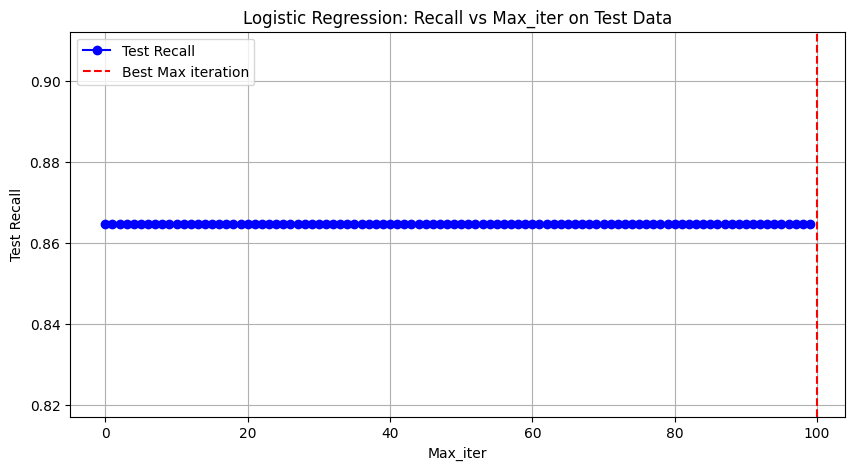

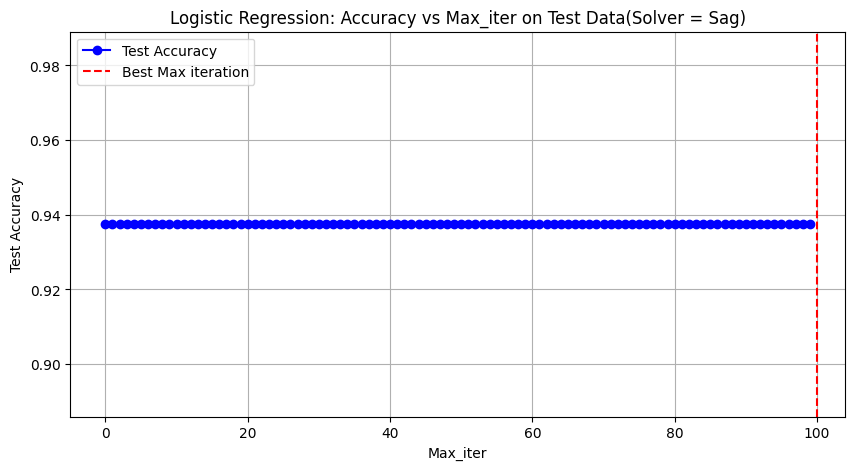

In [31]:
recalls = []
accuracies = []
for i in range(0,100):
    # evaluate_model(y_val_pred_log,y_valid,"Logistic Regression Validation(sag)",i)
    # evaluate_model(y_test_pred_log,y_test,"Logistic Regression Test(sag)",i)
    recall = recall_score(y_test_pred_log,y_test)
    recalls.append(recall)
    accuracy = accuracy_score(y_test_pred_log,y_test)
    accuracies.append(accuracy)
i = range(0,100)
plt.figure(figsize=(10, 5))
plt.plot(i, recalls, marker='o', linestyle='-', color='blue', label="Test Recall")
plt.axvline(x=100, color='red', linestyle='--', label="Best Max iteration")
plt.xlabel("Max_iter")
plt.ylabel("Test Recall")
plt.title("Logistic Regression: Recall vs Max_iter on Test Data")
plt.legend()
plt.grid()
plt.show()
plt.figure(figsize=(10, 5))
plt.plot(i, accuracies, marker='o', linestyle='-', color='blue', label="Test Accuracy")
plt.axvline(x=100, color='red', linestyle='--', label="Best Max iteration")
plt.xlabel("Max_iter")
plt.ylabel("Test Accuracy")
plt.title("Logistic Regression: Accuracy vs Max_iter on Test Data(Solver = Sag)")
plt.legend()
plt.grid()
plt.show()

In [32]:
def train_model_logistic(df_train, df_valid, df_test,max_iter, target_column="Hazardous"):

  X_train, y_train, X_valid, y_valid, X_test, y_test = x_y_separation(df_train, df_valid, df_test)
  logistic_reg = LogisticRegression(solver='liblinear',max_iter=max_iter)
  logistic_reg.fit(X_train,y_train)
  y_val_pred = logistic_reg.predict(X_valid)
  y_test_pred = logistic_reg.predict(X_test)

  return logistic_reg, y_valid, y_test, y_val_pred, y_test_pred

In [33]:
logistic_reg, y_valid, y_test, y_val_pred_log, y_test_pred_log  = train_model_logistic(df_train,df_valid,df_test,10000)


Evaluation Metrics for Logistic Regression Validation(liblinear):


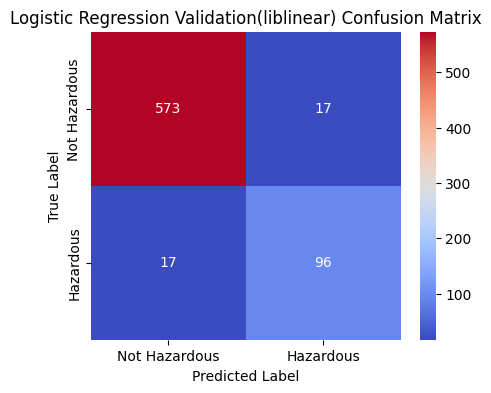


=== Evaluation Report for Logistic Regression Validation(liblinear) ===
Accuracy : 0.9516
Recall   : 0.8496
Precision: 0.8496
F1 Score : 0.8496

Classification Report:
               precision    recall  f1-score   support

       False       0.97      0.97      0.97       590
        True       0.85      0.85      0.85       113

    accuracy                           0.95       703
   macro avg       0.91      0.91      0.91       703
weighted avg       0.95      0.95      0.95       703


Evaluation Metrics for Logistic Regression Test(liblinear):


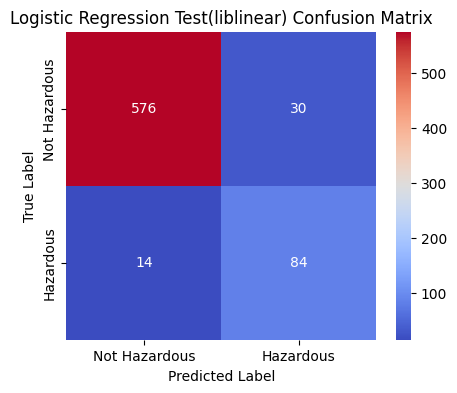


=== Evaluation Report for Logistic Regression Test(liblinear) ===
Accuracy : 0.9375
Recall   : 0.8571
Precision: 0.7368
F1 Score : 0.7925

Classification Report:
               precision    recall  f1-score   support

       False       0.98      0.95      0.96       606
        True       0.74      0.86      0.79        98

    accuracy                           0.94       704
   macro avg       0.86      0.90      0.88       704
weighted avg       0.94      0.94      0.94       704


Evaluation Metrics for Logistic Regression Validation(liblinear):


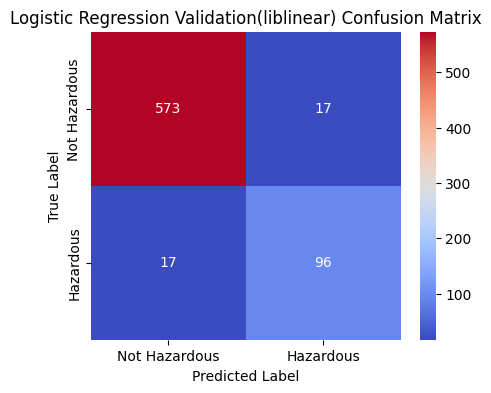


=== Evaluation Report for Logistic Regression Validation(liblinear) ===
Accuracy : 0.9516
Recall   : 0.8496
Precision: 0.8496
F1 Score : 0.8496

Classification Report:
               precision    recall  f1-score   support

       False       0.97      0.97      0.97       590
        True       0.85      0.85      0.85       113

    accuracy                           0.95       703
   macro avg       0.91      0.91      0.91       703
weighted avg       0.95      0.95      0.95       703


Evaluation Metrics for Logistic Regression Test(liblinear):


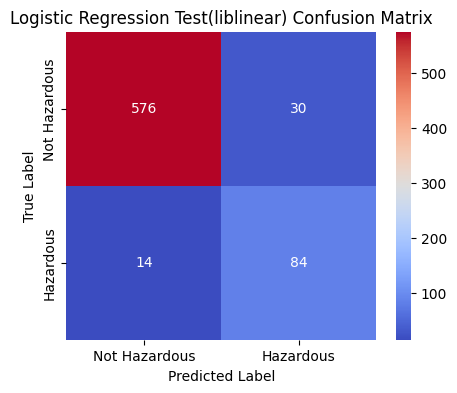


=== Evaluation Report for Logistic Regression Test(liblinear) ===
Accuracy : 0.9375
Recall   : 0.8571
Precision: 0.7368
F1 Score : 0.7925

Classification Report:
               precision    recall  f1-score   support

       False       0.98      0.95      0.96       606
        True       0.74      0.86      0.79        98

    accuracy                           0.94       704
   macro avg       0.86      0.90      0.88       704
weighted avg       0.94      0.94      0.94       704


Evaluation Metrics for Logistic Regression Validation(liblinear):


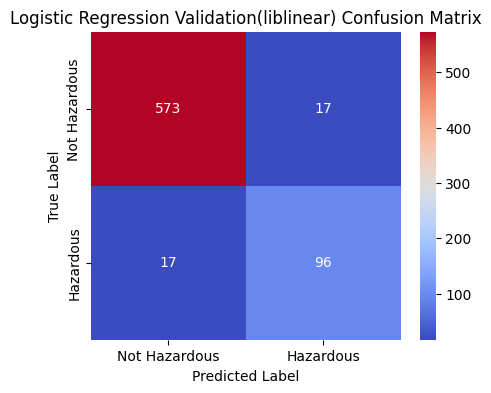


=== Evaluation Report for Logistic Regression Validation(liblinear) ===
Accuracy : 0.9516
Recall   : 0.8496
Precision: 0.8496
F1 Score : 0.8496

Classification Report:
               precision    recall  f1-score   support

       False       0.97      0.97      0.97       590
        True       0.85      0.85      0.85       113

    accuracy                           0.95       703
   macro avg       0.91      0.91      0.91       703
weighted avg       0.95      0.95      0.95       703


Evaluation Metrics for Logistic Regression Test(liblinear):


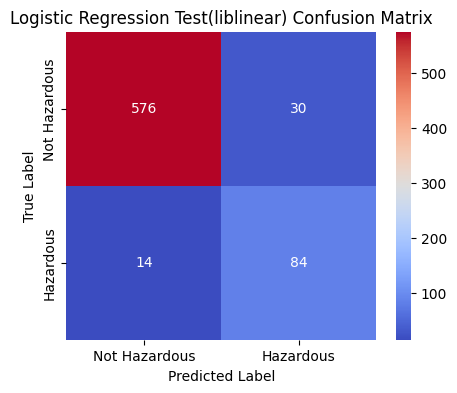


=== Evaluation Report for Logistic Regression Test(liblinear) ===
Accuracy : 0.9375
Recall   : 0.8571
Precision: 0.7368
F1 Score : 0.7925

Classification Report:
               precision    recall  f1-score   support

       False       0.98      0.95      0.96       606
        True       0.74      0.86      0.79        98

    accuracy                           0.94       704
   macro avg       0.86      0.90      0.88       704
weighted avg       0.94      0.94      0.94       704


Evaluation Metrics for Logistic Regression Validation(liblinear):


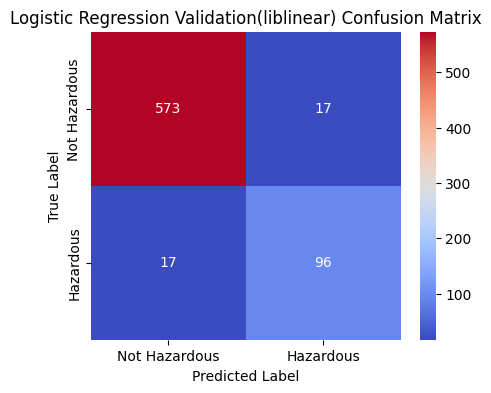


=== Evaluation Report for Logistic Regression Validation(liblinear) ===
Accuracy : 0.9516
Recall   : 0.8496
Precision: 0.8496
F1 Score : 0.8496

Classification Report:
               precision    recall  f1-score   support

       False       0.97      0.97      0.97       590
        True       0.85      0.85      0.85       113

    accuracy                           0.95       703
   macro avg       0.91      0.91      0.91       703
weighted avg       0.95      0.95      0.95       703


Evaluation Metrics for Logistic Regression Test(liblinear):


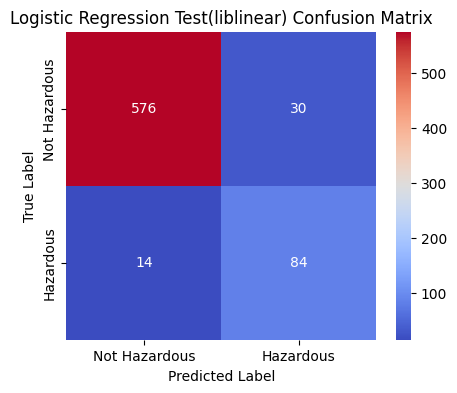


=== Evaluation Report for Logistic Regression Test(liblinear) ===
Accuracy : 0.9375
Recall   : 0.8571
Precision: 0.7368
F1 Score : 0.7925

Classification Report:
               precision    recall  f1-score   support

       False       0.98      0.95      0.96       606
        True       0.74      0.86      0.79        98

    accuracy                           0.94       704
   macro avg       0.86      0.90      0.88       704
weighted avg       0.94      0.94      0.94       704


Evaluation Metrics for Logistic Regression Validation(liblinear):


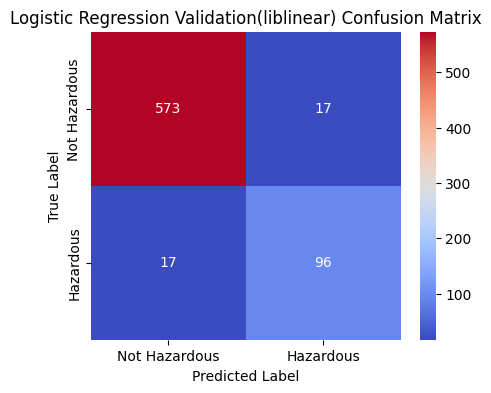


=== Evaluation Report for Logistic Regression Validation(liblinear) ===
Accuracy : 0.9516
Recall   : 0.8496
Precision: 0.8496
F1 Score : 0.8496

Classification Report:
               precision    recall  f1-score   support

       False       0.97      0.97      0.97       590
        True       0.85      0.85      0.85       113

    accuracy                           0.95       703
   macro avg       0.91      0.91      0.91       703
weighted avg       0.95      0.95      0.95       703


Evaluation Metrics for Logistic Regression Test(liblinear):


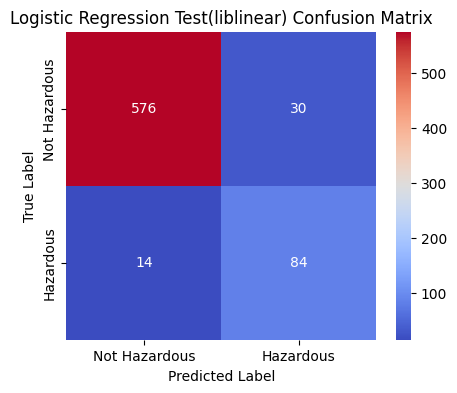


=== Evaluation Report for Logistic Regression Test(liblinear) ===
Accuracy : 0.9375
Recall   : 0.8571
Precision: 0.7368
F1 Score : 0.7925

Classification Report:
               precision    recall  f1-score   support

       False       0.98      0.95      0.96       606
        True       0.74      0.86      0.79        98

    accuracy                           0.94       704
   macro avg       0.86      0.90      0.88       704
weighted avg       0.94      0.94      0.94       704


Evaluation Metrics for Logistic Regression Validation(liblinear):


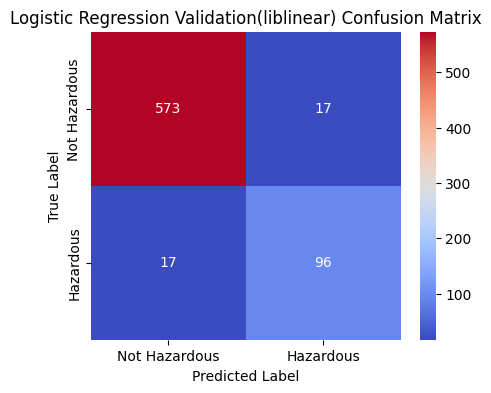


=== Evaluation Report for Logistic Regression Validation(liblinear) ===
Accuracy : 0.9516
Recall   : 0.8496
Precision: 0.8496
F1 Score : 0.8496

Classification Report:
               precision    recall  f1-score   support

       False       0.97      0.97      0.97       590
        True       0.85      0.85      0.85       113

    accuracy                           0.95       703
   macro avg       0.91      0.91      0.91       703
weighted avg       0.95      0.95      0.95       703


Evaluation Metrics for Logistic Regression Test(liblinear):


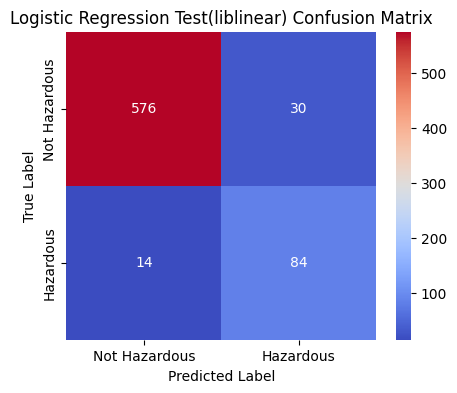


=== Evaluation Report for Logistic Regression Test(liblinear) ===
Accuracy : 0.9375
Recall   : 0.8571
Precision: 0.7368
F1 Score : 0.7925

Classification Report:
               precision    recall  f1-score   support

       False       0.98      0.95      0.96       606
        True       0.74      0.86      0.79        98

    accuracy                           0.94       704
   macro avg       0.86      0.90      0.88       704
weighted avg       0.94      0.94      0.94       704


Evaluation Metrics for Logistic Regression Validation(liblinear):


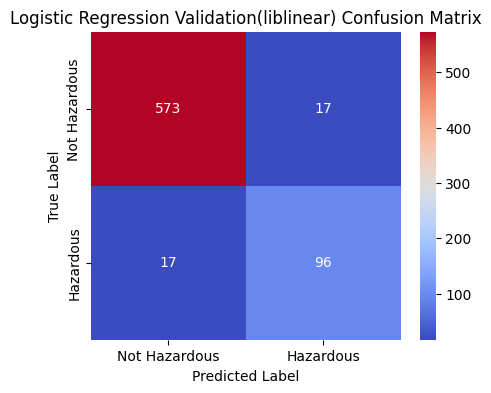


=== Evaluation Report for Logistic Regression Validation(liblinear) ===
Accuracy : 0.9516
Recall   : 0.8496
Precision: 0.8496
F1 Score : 0.8496

Classification Report:
               precision    recall  f1-score   support

       False       0.97      0.97      0.97       590
        True       0.85      0.85      0.85       113

    accuracy                           0.95       703
   macro avg       0.91      0.91      0.91       703
weighted avg       0.95      0.95      0.95       703


Evaluation Metrics for Logistic Regression Test(liblinear):


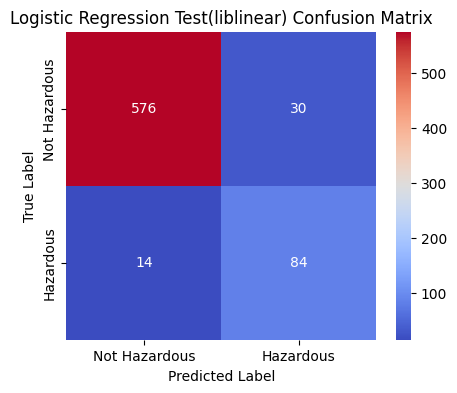


=== Evaluation Report for Logistic Regression Test(liblinear) ===
Accuracy : 0.9375
Recall   : 0.8571
Precision: 0.7368
F1 Score : 0.7925

Classification Report:
               precision    recall  f1-score   support

       False       0.98      0.95      0.96       606
        True       0.74      0.86      0.79        98

    accuracy                           0.94       704
   macro avg       0.86      0.90      0.88       704
weighted avg       0.94      0.94      0.94       704


Evaluation Metrics for Logistic Regression Validation(liblinear):


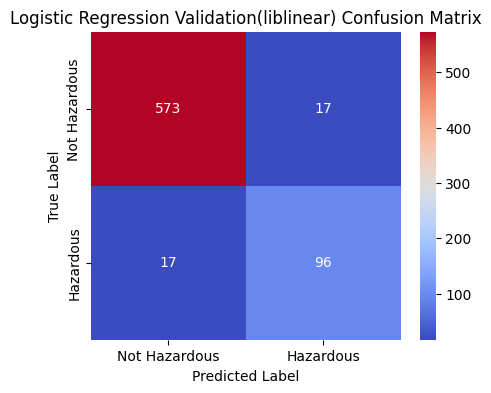


=== Evaluation Report for Logistic Regression Validation(liblinear) ===
Accuracy : 0.9516
Recall   : 0.8496
Precision: 0.8496
F1 Score : 0.8496

Classification Report:
               precision    recall  f1-score   support

       False       0.97      0.97      0.97       590
        True       0.85      0.85      0.85       113

    accuracy                           0.95       703
   macro avg       0.91      0.91      0.91       703
weighted avg       0.95      0.95      0.95       703


Evaluation Metrics for Logistic Regression Test(liblinear):


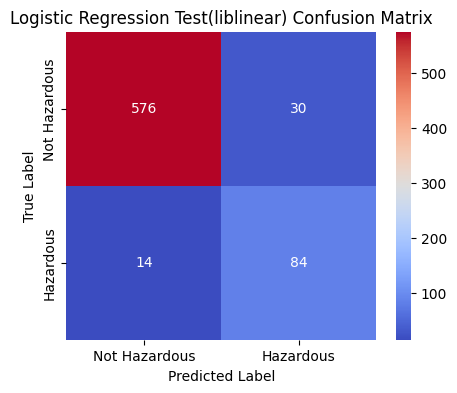


=== Evaluation Report for Logistic Regression Test(liblinear) ===
Accuracy : 0.9375
Recall   : 0.8571
Precision: 0.7368
F1 Score : 0.7925

Classification Report:
               precision    recall  f1-score   support

       False       0.98      0.95      0.96       606
        True       0.74      0.86      0.79        98

    accuracy                           0.94       704
   macro avg       0.86      0.90      0.88       704
weighted avg       0.94      0.94      0.94       704


Evaluation Metrics for Logistic Regression Validation(liblinear):


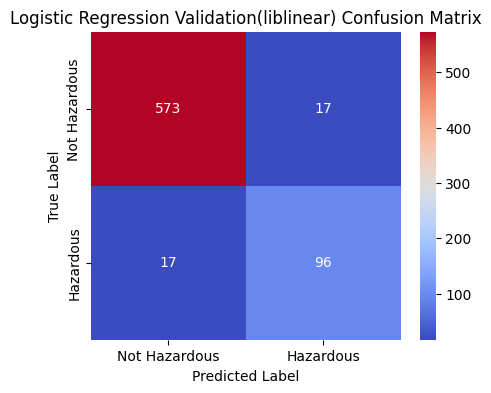


=== Evaluation Report for Logistic Regression Validation(liblinear) ===
Accuracy : 0.9516
Recall   : 0.8496
Precision: 0.8496
F1 Score : 0.8496

Classification Report:
               precision    recall  f1-score   support

       False       0.97      0.97      0.97       590
        True       0.85      0.85      0.85       113

    accuracy                           0.95       703
   macro avg       0.91      0.91      0.91       703
weighted avg       0.95      0.95      0.95       703


Evaluation Metrics for Logistic Regression Test(liblinear):


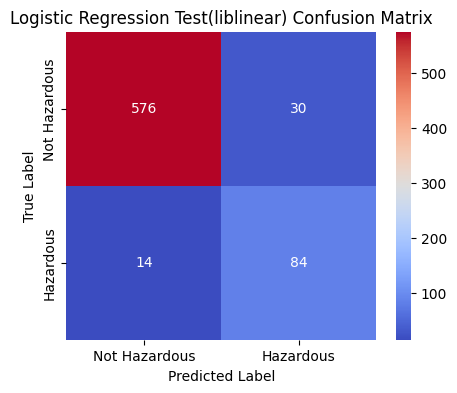


=== Evaluation Report for Logistic Regression Test(liblinear) ===
Accuracy : 0.9375
Recall   : 0.8571
Precision: 0.7368
F1 Score : 0.7925

Classification Report:
               precision    recall  f1-score   support

       False       0.98      0.95      0.96       606
        True       0.74      0.86      0.79        98

    accuracy                           0.94       704
   macro avg       0.86      0.90      0.88       704
weighted avg       0.94      0.94      0.94       704



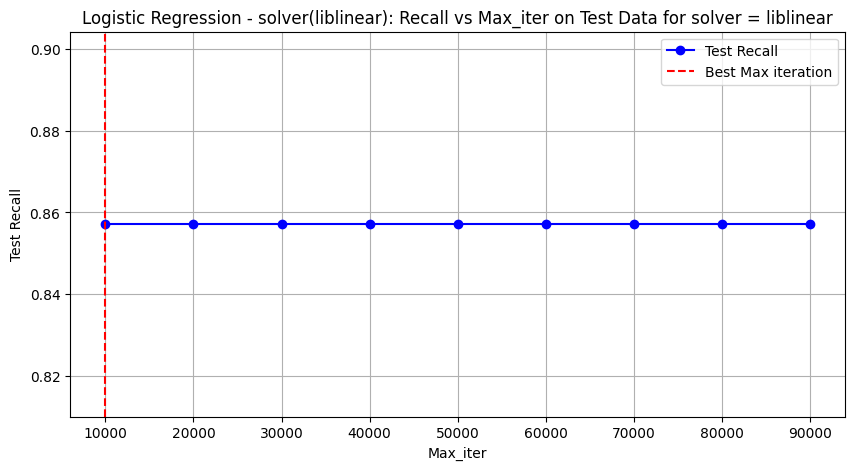

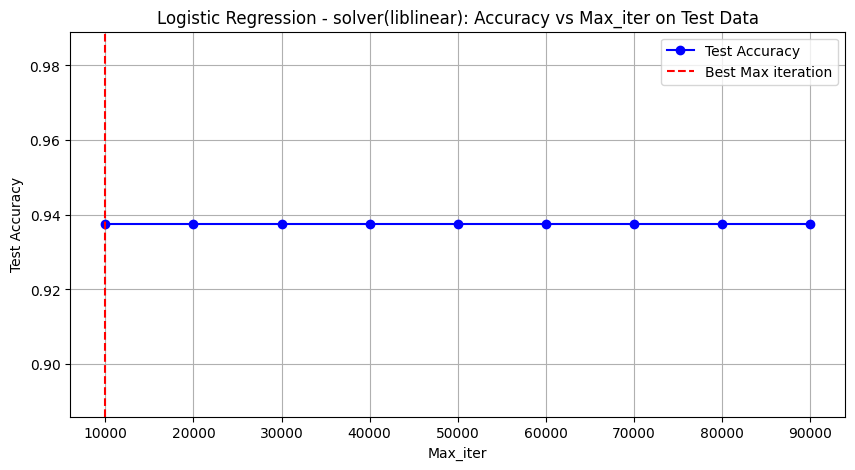

In [34]:
recalls = []
accuracie =[]
for i in range(10000,100000,10000):
    evaluate_model(y_val_pred_log,y_valid,"Logistic Regression Validation(liblinear)",i)
    evaluate_model(y_test_pred_log,y_test,"Logistic Regression Test(liblinear)",i)
    recall = recall_score(y_test_pred_log,y_test)
    recalls.append(recall)
    accuracy_lib = accuracy_score(y_test_pred_log,y_test)
    accuracie.append(accuracy_lib)
i = [10000,20000,30000,40000,50000,60000,70000,80000,90000]
plt.figure(figsize=(10, 5))
plt.plot(i, recalls, marker='o', linestyle='-', color='blue', label="Test Recall")
plt.axvline(x=10000, color='red', linestyle='--', label="Best Max iteration")
plt.xlabel("Max_iter")
plt.ylabel("Test Recall")
plt.title("Logistic Regression - solver(liblinear): Recall vs Max_iter on Test Data for solver = liblinear")
plt.legend()
plt.grid()
plt.show()
plt.figure(figsize=(10, 5))
plt.plot(i, accuracie, marker='o', linestyle='-', color='blue', label="Test Accuracy")
plt.axvline(x=10000, color='red', linestyle='--', label="Best Max iteration")
plt.xlabel("Max_iter")
plt.ylabel("Test Accuracy")
plt.title("Logistic Regression - solver(liblinear): Accuracy vs Max_iter on Test Data")
plt.legend()
plt.grid()
plt.show()

In [35]:
def train_model_logistic(df_train, df_valid, df_test,max_iter, target_column="Hazardous"):

  X_train, y_train, X_valid, y_valid, X_test, y_test = x_y_separation(df_train, df_valid, df_test)
  logistic_reg = LogisticRegression(solver='saga',max_iter=max_iter)
  logistic_reg.fit(X_train,y_train)
  y_val_pred = logistic_reg.predict(X_valid)
  y_test_pred = logistic_reg.predict(X_test)

  return logistic_reg, y_valid, y_test, y_val_pred, y_test_pred

logistic_reg, y_valid, y_test, y_val_pred_log, y_test_pred_log  = train_model_logistic(df_train,df_valid,df_test,10000)



Evaluation Metrics for Logistic Regression Validation(Saga):


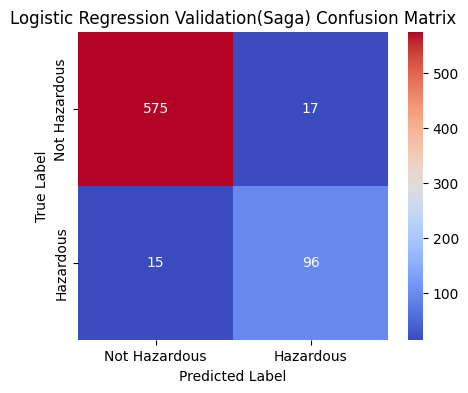


=== Evaluation Report for Logistic Regression Validation(Saga) ===
Accuracy : 0.9545
Recall   : 0.8649
Precision: 0.8496
F1 Score : 0.8571

Classification Report:
               precision    recall  f1-score   support

       False       0.97      0.97      0.97       592
        True       0.85      0.86      0.86       111

    accuracy                           0.95       703
   macro avg       0.91      0.92      0.92       703
weighted avg       0.95      0.95      0.95       703


Evaluation Metrics for Logistic Regression Test(Saga):


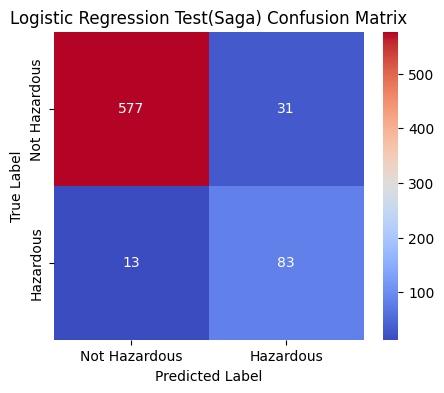


=== Evaluation Report for Logistic Regression Test(Saga) ===
Accuracy : 0.9375
Recall   : 0.8646
Precision: 0.7281
F1 Score : 0.7905

Classification Report:
               precision    recall  f1-score   support

       False       0.98      0.95      0.96       608
        True       0.73      0.86      0.79        96

    accuracy                           0.94       704
   macro avg       0.85      0.91      0.88       704
weighted avg       0.94      0.94      0.94       704


Evaluation Metrics for Logistic Regression Validation(Saga):


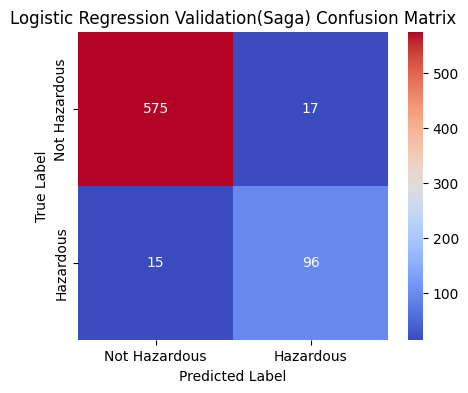


=== Evaluation Report for Logistic Regression Validation(Saga) ===
Accuracy : 0.9545
Recall   : 0.8649
Precision: 0.8496
F1 Score : 0.8571

Classification Report:
               precision    recall  f1-score   support

       False       0.97      0.97      0.97       592
        True       0.85      0.86      0.86       111

    accuracy                           0.95       703
   macro avg       0.91      0.92      0.92       703
weighted avg       0.95      0.95      0.95       703


Evaluation Metrics for Logistic Regression Test(Saga):


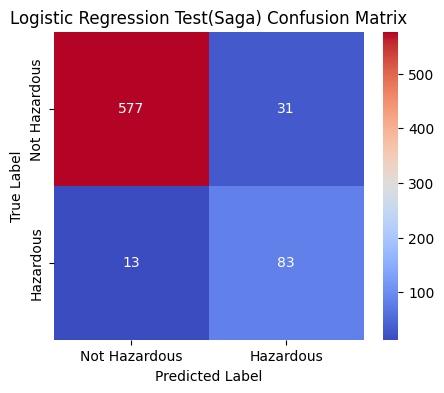


=== Evaluation Report for Logistic Regression Test(Saga) ===
Accuracy : 0.9375
Recall   : 0.8646
Precision: 0.7281
F1 Score : 0.7905

Classification Report:
               precision    recall  f1-score   support

       False       0.98      0.95      0.96       608
        True       0.73      0.86      0.79        96

    accuracy                           0.94       704
   macro avg       0.85      0.91      0.88       704
weighted avg       0.94      0.94      0.94       704


Evaluation Metrics for Logistic Regression Validation(Saga):


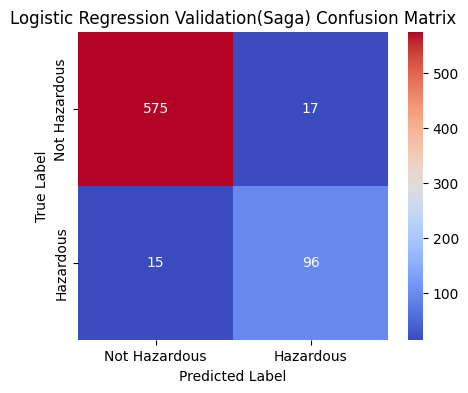


=== Evaluation Report for Logistic Regression Validation(Saga) ===
Accuracy : 0.9545
Recall   : 0.8649
Precision: 0.8496
F1 Score : 0.8571

Classification Report:
               precision    recall  f1-score   support

       False       0.97      0.97      0.97       592
        True       0.85      0.86      0.86       111

    accuracy                           0.95       703
   macro avg       0.91      0.92      0.92       703
weighted avg       0.95      0.95      0.95       703


Evaluation Metrics for Logistic Regression Test(Saga):


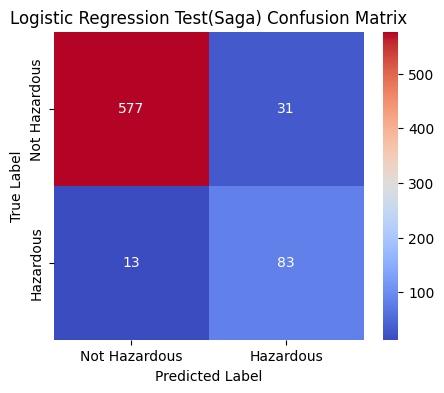


=== Evaluation Report for Logistic Regression Test(Saga) ===
Accuracy : 0.9375
Recall   : 0.8646
Precision: 0.7281
F1 Score : 0.7905

Classification Report:
               precision    recall  f1-score   support

       False       0.98      0.95      0.96       608
        True       0.73      0.86      0.79        96

    accuracy                           0.94       704
   macro avg       0.85      0.91      0.88       704
weighted avg       0.94      0.94      0.94       704


Evaluation Metrics for Logistic Regression Validation(Saga):


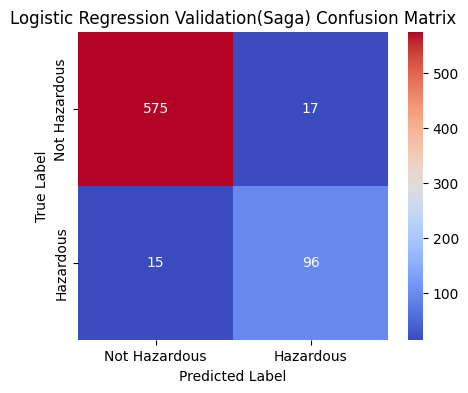


=== Evaluation Report for Logistic Regression Validation(Saga) ===
Accuracy : 0.9545
Recall   : 0.8649
Precision: 0.8496
F1 Score : 0.8571

Classification Report:
               precision    recall  f1-score   support

       False       0.97      0.97      0.97       592
        True       0.85      0.86      0.86       111

    accuracy                           0.95       703
   macro avg       0.91      0.92      0.92       703
weighted avg       0.95      0.95      0.95       703


Evaluation Metrics for Logistic Regression Test(Saga):


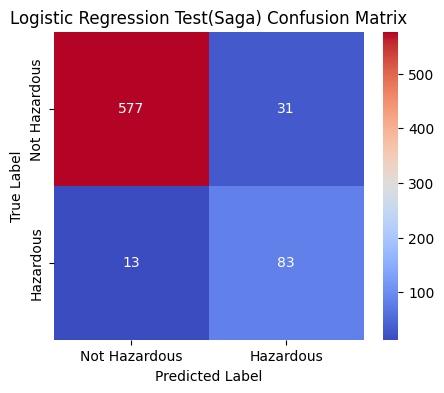


=== Evaluation Report for Logistic Regression Test(Saga) ===
Accuracy : 0.9375
Recall   : 0.8646
Precision: 0.7281
F1 Score : 0.7905

Classification Report:
               precision    recall  f1-score   support

       False       0.98      0.95      0.96       608
        True       0.73      0.86      0.79        96

    accuracy                           0.94       704
   macro avg       0.85      0.91      0.88       704
weighted avg       0.94      0.94      0.94       704


Evaluation Metrics for Logistic Regression Validation(Saga):


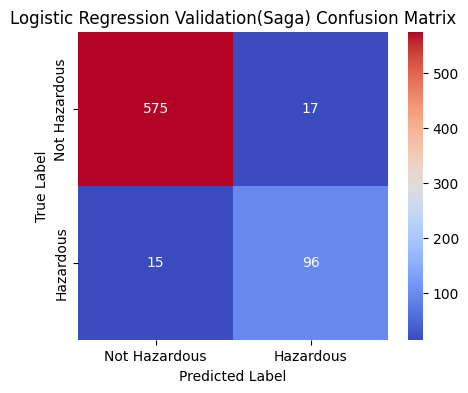


=== Evaluation Report for Logistic Regression Validation(Saga) ===
Accuracy : 0.9545
Recall   : 0.8649
Precision: 0.8496
F1 Score : 0.8571

Classification Report:
               precision    recall  f1-score   support

       False       0.97      0.97      0.97       592
        True       0.85      0.86      0.86       111

    accuracy                           0.95       703
   macro avg       0.91      0.92      0.92       703
weighted avg       0.95      0.95      0.95       703


Evaluation Metrics for Logistic Regression Test(Saga):


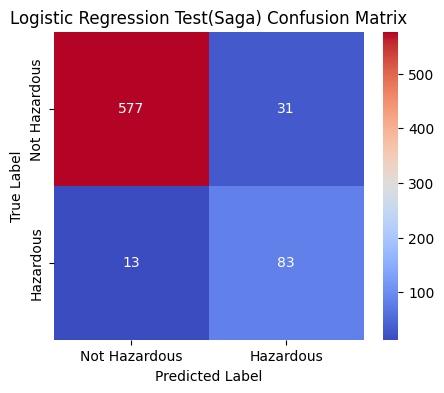


=== Evaluation Report for Logistic Regression Test(Saga) ===
Accuracy : 0.9375
Recall   : 0.8646
Precision: 0.7281
F1 Score : 0.7905

Classification Report:
               precision    recall  f1-score   support

       False       0.98      0.95      0.96       608
        True       0.73      0.86      0.79        96

    accuracy                           0.94       704
   macro avg       0.85      0.91      0.88       704
weighted avg       0.94      0.94      0.94       704


Evaluation Metrics for Logistic Regression Validation(Saga):


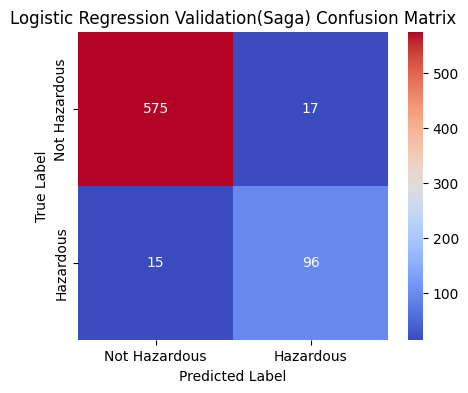


=== Evaluation Report for Logistic Regression Validation(Saga) ===
Accuracy : 0.9545
Recall   : 0.8649
Precision: 0.8496
F1 Score : 0.8571

Classification Report:
               precision    recall  f1-score   support

       False       0.97      0.97      0.97       592
        True       0.85      0.86      0.86       111

    accuracy                           0.95       703
   macro avg       0.91      0.92      0.92       703
weighted avg       0.95      0.95      0.95       703


Evaluation Metrics for Logistic Regression Test(Saga):


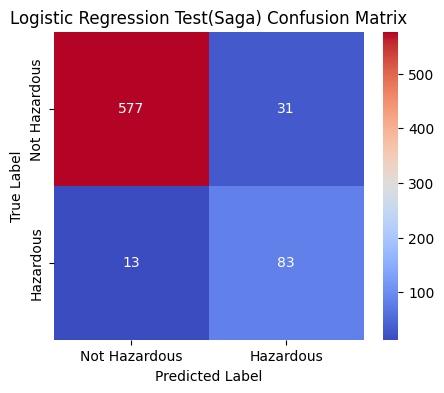


=== Evaluation Report for Logistic Regression Test(Saga) ===
Accuracy : 0.9375
Recall   : 0.8646
Precision: 0.7281
F1 Score : 0.7905

Classification Report:
               precision    recall  f1-score   support

       False       0.98      0.95      0.96       608
        True       0.73      0.86      0.79        96

    accuracy                           0.94       704
   macro avg       0.85      0.91      0.88       704
weighted avg       0.94      0.94      0.94       704


Evaluation Metrics for Logistic Regression Validation(Saga):


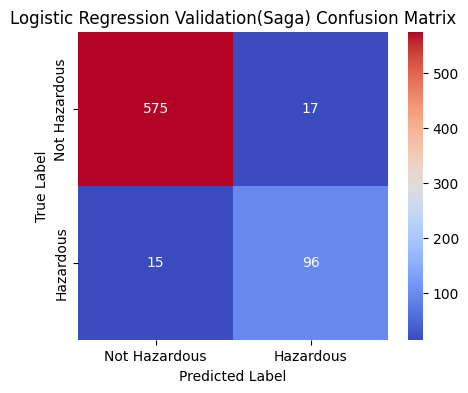


=== Evaluation Report for Logistic Regression Validation(Saga) ===
Accuracy : 0.9545
Recall   : 0.8649
Precision: 0.8496
F1 Score : 0.8571

Classification Report:
               precision    recall  f1-score   support

       False       0.97      0.97      0.97       592
        True       0.85      0.86      0.86       111

    accuracy                           0.95       703
   macro avg       0.91      0.92      0.92       703
weighted avg       0.95      0.95      0.95       703


Evaluation Metrics for Logistic Regression Test(Saga):


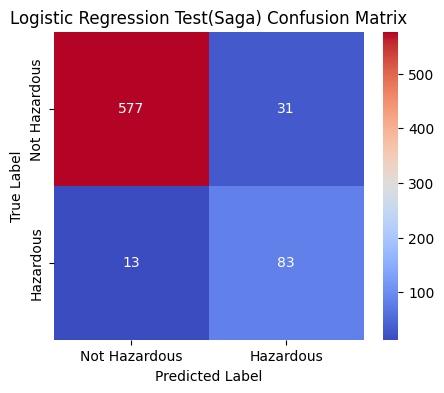


=== Evaluation Report for Logistic Regression Test(Saga) ===
Accuracy : 0.9375
Recall   : 0.8646
Precision: 0.7281
F1 Score : 0.7905

Classification Report:
               precision    recall  f1-score   support

       False       0.98      0.95      0.96       608
        True       0.73      0.86      0.79        96

    accuracy                           0.94       704
   macro avg       0.85      0.91      0.88       704
weighted avg       0.94      0.94      0.94       704


Evaluation Metrics for Logistic Regression Validation(Saga):


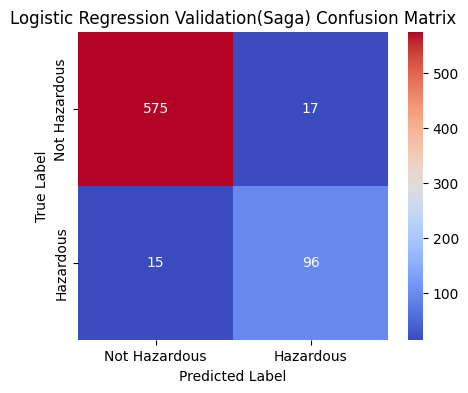


=== Evaluation Report for Logistic Regression Validation(Saga) ===
Accuracy : 0.9545
Recall   : 0.8649
Precision: 0.8496
F1 Score : 0.8571

Classification Report:
               precision    recall  f1-score   support

       False       0.97      0.97      0.97       592
        True       0.85      0.86      0.86       111

    accuracy                           0.95       703
   macro avg       0.91      0.92      0.92       703
weighted avg       0.95      0.95      0.95       703


Evaluation Metrics for Logistic Regression Test(Saga):


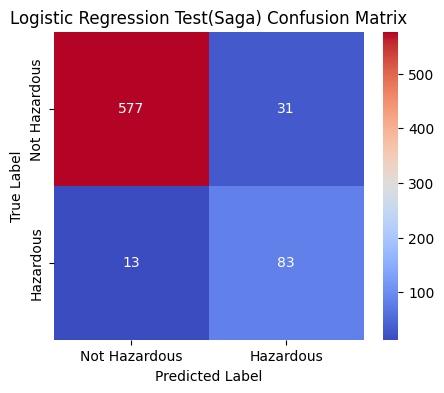


=== Evaluation Report for Logistic Regression Test(Saga) ===
Accuracy : 0.9375
Recall   : 0.8646
Precision: 0.7281
F1 Score : 0.7905

Classification Report:
               precision    recall  f1-score   support

       False       0.98      0.95      0.96       608
        True       0.73      0.86      0.79        96

    accuracy                           0.94       704
   macro avg       0.85      0.91      0.88       704
weighted avg       0.94      0.94      0.94       704


Evaluation Metrics for Logistic Regression Validation(Saga):


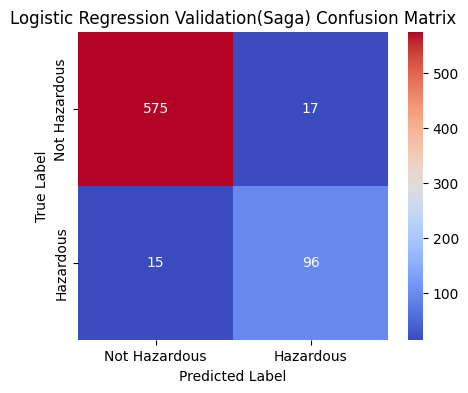


=== Evaluation Report for Logistic Regression Validation(Saga) ===
Accuracy : 0.9545
Recall   : 0.8649
Precision: 0.8496
F1 Score : 0.8571

Classification Report:
               precision    recall  f1-score   support

       False       0.97      0.97      0.97       592
        True       0.85      0.86      0.86       111

    accuracy                           0.95       703
   macro avg       0.91      0.92      0.92       703
weighted avg       0.95      0.95      0.95       703


Evaluation Metrics for Logistic Regression Test(Saga):


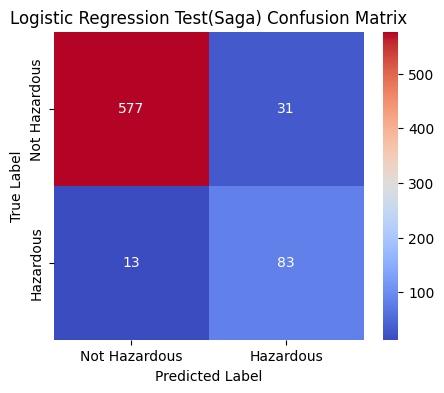


=== Evaluation Report for Logistic Regression Test(Saga) ===
Accuracy : 0.9375
Recall   : 0.8646
Precision: 0.7281
F1 Score : 0.7905

Classification Report:
               precision    recall  f1-score   support

       False       0.98      0.95      0.96       608
        True       0.73      0.86      0.79        96

    accuracy                           0.94       704
   macro avg       0.85      0.91      0.88       704
weighted avg       0.94      0.94      0.94       704



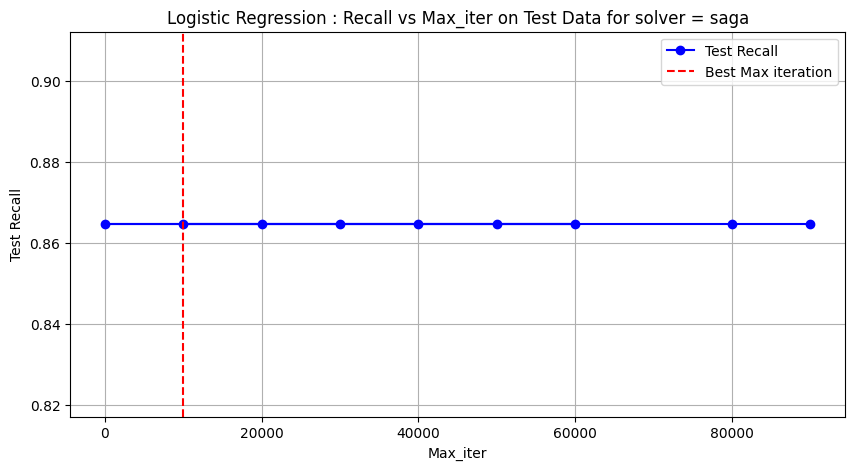

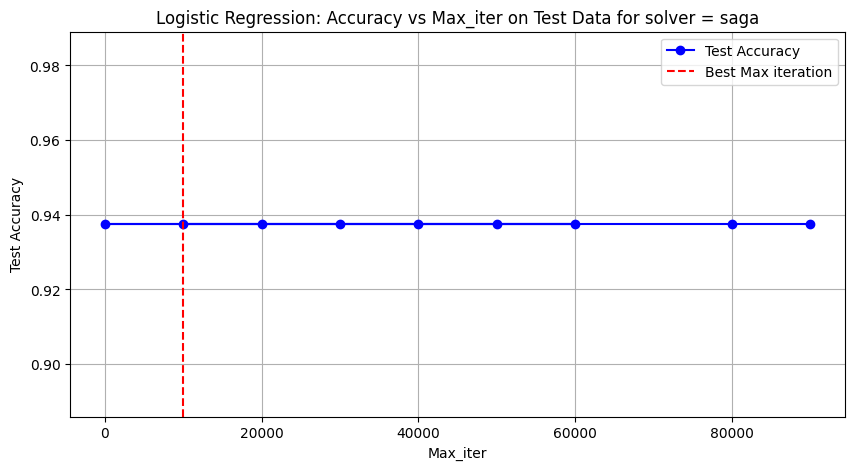

In [36]:
recalls = []
accuracies_saga = []
for i in range(10000,100000,10000):
    evaluate_model(y_val_pred_log,y_valid,"Logistic Regression Validation(Saga)",i)
    evaluate_model(y_test_pred_log,y_test,"Logistic Regression Test(Saga)",i)
    recall = recall_score(y_test_pred_log,y_test)
    recalls.append(recall)
    accuracy_saga = accuracy_score(y_test_pred_log,y_test)
    accuracies_saga.append(accuracy_saga)
i = [10000,20000,30000,40000,50000,60000,70,80000,90000]
plt.figure(figsize=(10, 5))
plt.plot(i, recalls, marker='o', linestyle='-', color='blue', label="Test Recall")
plt.axvline(x=10000, color='red', linestyle='--', label="Best Max iteration")
plt.xlabel("Max_iter")
plt.ylabel("Test Recall")
plt.title("Logistic Regression : Recall vs Max_iter on Test Data for solver = saga")
plt.legend()
plt.grid()
plt.show()
plt.figure(figsize=(10, 5))
plt.plot(i, accuracies_saga, marker='o', linestyle='-', color='blue', label="Test Accuracy")
plt.axvline(x=10000, color='red', linestyle='--', label="Best Max iteration")
plt.xlabel("Max_iter")
plt.ylabel("Test Accuracy")
plt.title("Logistic Regression: Accuracy vs Max_iter on Test Data for solver = saga")
plt.legend()
plt.grid()
plt.show()

In [37]:
def train_model_logistic(df_train, df_valid, df_test,max_iter, target_column="Hazardous"):

  X_train, y_train, X_valid, y_valid, X_test, y_test = x_y_separation(df_train, df_valid, df_test)
  logistic_reg = LogisticRegression(solver='newton-cg',max_iter=max_iter)
  logistic_reg.fit(X_train,y_train)
  y_val_pred = logistic_reg.predict(X_valid)
  y_test_pred = logistic_reg.predict(X_test)

  return logistic_reg, y_valid, y_test, y_val_pred, y_test_pred

logistic_reg, y_valid, y_test, y_val_pred_log, y_test_pred_log  = train_model_logistic(df_train,df_valid,df_test,10000)



Evaluation Metrics for Logistic Regression Validation(Newton-sg):


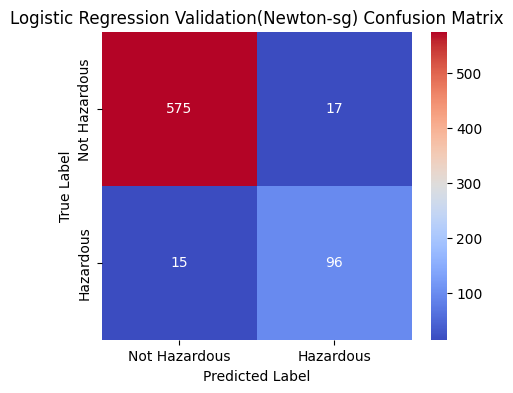


=== Evaluation Report for Logistic Regression Validation(Newton-sg) ===
Accuracy : 0.9545
Recall   : 0.8649
Precision: 0.8496
F1 Score : 0.8571

Classification Report:
               precision    recall  f1-score   support

       False       0.97      0.97      0.97       592
        True       0.85      0.86      0.86       111

    accuracy                           0.95       703
   macro avg       0.91      0.92      0.92       703
weighted avg       0.95      0.95      0.95       703


Evaluation Metrics for Logistic Regression Test(Newton-sg):


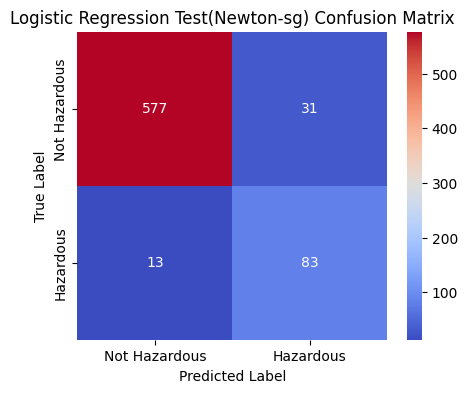


=== Evaluation Report for Logistic Regression Test(Newton-sg) ===
Accuracy : 0.9375
Recall   : 0.8646
Precision: 0.7281
F1 Score : 0.7905

Classification Report:
               precision    recall  f1-score   support

       False       0.98      0.95      0.96       608
        True       0.73      0.86      0.79        96

    accuracy                           0.94       704
   macro avg       0.85      0.91      0.88       704
weighted avg       0.94      0.94      0.94       704


Evaluation Metrics for Logistic Regression Validation(Newton-sg):


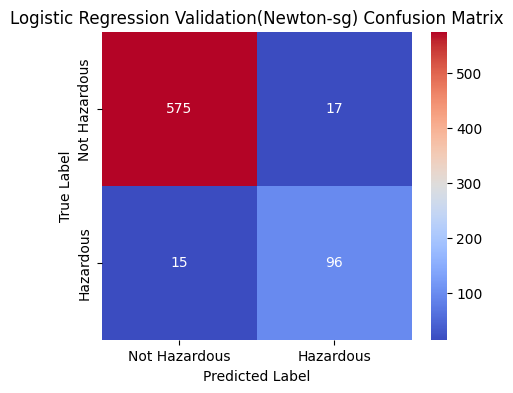


=== Evaluation Report for Logistic Regression Validation(Newton-sg) ===
Accuracy : 0.9545
Recall   : 0.8649
Precision: 0.8496
F1 Score : 0.8571

Classification Report:
               precision    recall  f1-score   support

       False       0.97      0.97      0.97       592
        True       0.85      0.86      0.86       111

    accuracy                           0.95       703
   macro avg       0.91      0.92      0.92       703
weighted avg       0.95      0.95      0.95       703


Evaluation Metrics for Logistic Regression Test(Newton-sg):


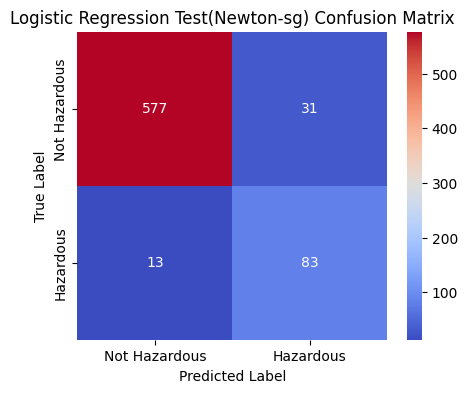


=== Evaluation Report for Logistic Regression Test(Newton-sg) ===
Accuracy : 0.9375
Recall   : 0.8646
Precision: 0.7281
F1 Score : 0.7905

Classification Report:
               precision    recall  f1-score   support

       False       0.98      0.95      0.96       608
        True       0.73      0.86      0.79        96

    accuracy                           0.94       704
   macro avg       0.85      0.91      0.88       704
weighted avg       0.94      0.94      0.94       704


Evaluation Metrics for Logistic Regression Validation(Newton-sg):


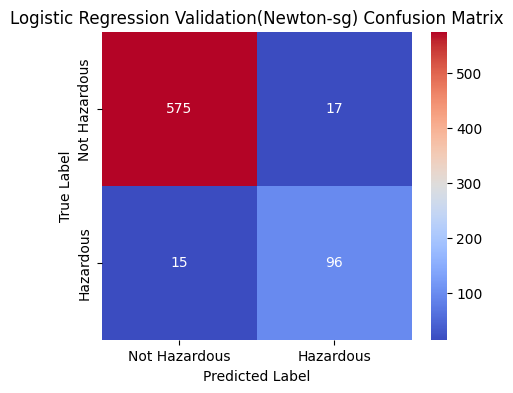


=== Evaluation Report for Logistic Regression Validation(Newton-sg) ===
Accuracy : 0.9545
Recall   : 0.8649
Precision: 0.8496
F1 Score : 0.8571

Classification Report:
               precision    recall  f1-score   support

       False       0.97      0.97      0.97       592
        True       0.85      0.86      0.86       111

    accuracy                           0.95       703
   macro avg       0.91      0.92      0.92       703
weighted avg       0.95      0.95      0.95       703


Evaluation Metrics for Logistic Regression Test(Newton-sg):


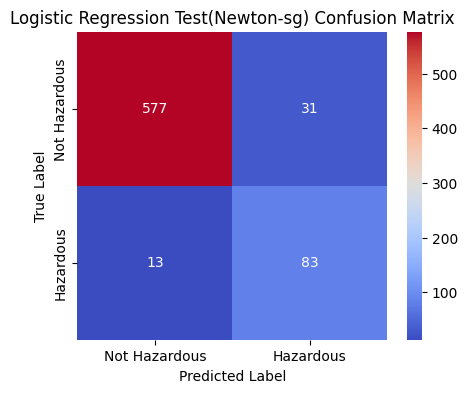


=== Evaluation Report for Logistic Regression Test(Newton-sg) ===
Accuracy : 0.9375
Recall   : 0.8646
Precision: 0.7281
F1 Score : 0.7905

Classification Report:
               precision    recall  f1-score   support

       False       0.98      0.95      0.96       608
        True       0.73      0.86      0.79        96

    accuracy                           0.94       704
   macro avg       0.85      0.91      0.88       704
weighted avg       0.94      0.94      0.94       704


Evaluation Metrics for Logistic Regression Validation(Newton-sg):


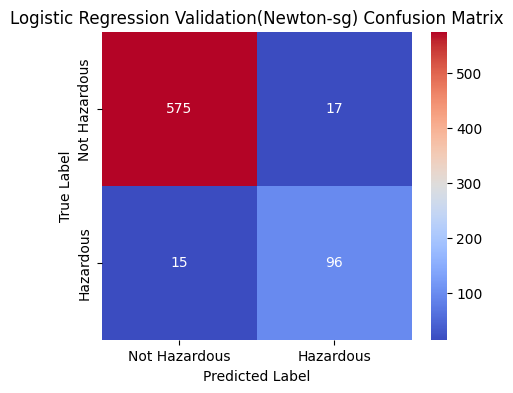


=== Evaluation Report for Logistic Regression Validation(Newton-sg) ===
Accuracy : 0.9545
Recall   : 0.8649
Precision: 0.8496
F1 Score : 0.8571

Classification Report:
               precision    recall  f1-score   support

       False       0.97      0.97      0.97       592
        True       0.85      0.86      0.86       111

    accuracy                           0.95       703
   macro avg       0.91      0.92      0.92       703
weighted avg       0.95      0.95      0.95       703


Evaluation Metrics for Logistic Regression Test(Newton-sg):


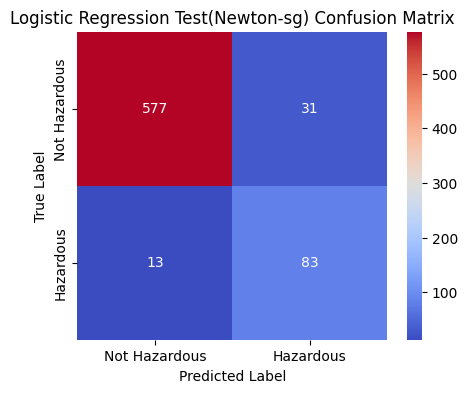


=== Evaluation Report for Logistic Regression Test(Newton-sg) ===
Accuracy : 0.9375
Recall   : 0.8646
Precision: 0.7281
F1 Score : 0.7905

Classification Report:
               precision    recall  f1-score   support

       False       0.98      0.95      0.96       608
        True       0.73      0.86      0.79        96

    accuracy                           0.94       704
   macro avg       0.85      0.91      0.88       704
weighted avg       0.94      0.94      0.94       704


Evaluation Metrics for Logistic Regression Validation(Newton-sg):


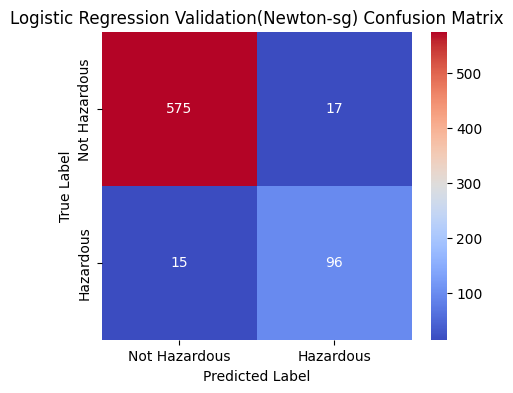


=== Evaluation Report for Logistic Regression Validation(Newton-sg) ===
Accuracy : 0.9545
Recall   : 0.8649
Precision: 0.8496
F1 Score : 0.8571

Classification Report:
               precision    recall  f1-score   support

       False       0.97      0.97      0.97       592
        True       0.85      0.86      0.86       111

    accuracy                           0.95       703
   macro avg       0.91      0.92      0.92       703
weighted avg       0.95      0.95      0.95       703


Evaluation Metrics for Logistic Regression Test(Newton-sg):


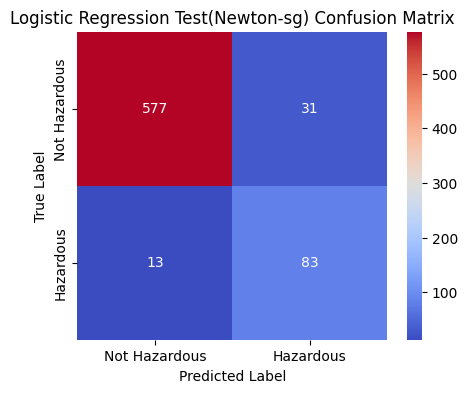


=== Evaluation Report for Logistic Regression Test(Newton-sg) ===
Accuracy : 0.9375
Recall   : 0.8646
Precision: 0.7281
F1 Score : 0.7905

Classification Report:
               precision    recall  f1-score   support

       False       0.98      0.95      0.96       608
        True       0.73      0.86      0.79        96

    accuracy                           0.94       704
   macro avg       0.85      0.91      0.88       704
weighted avg       0.94      0.94      0.94       704


Evaluation Metrics for Logistic Regression Validation(Newton-sg):


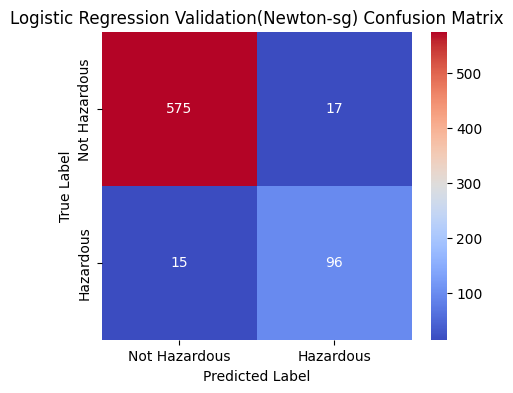


=== Evaluation Report for Logistic Regression Validation(Newton-sg) ===
Accuracy : 0.9545
Recall   : 0.8649
Precision: 0.8496
F1 Score : 0.8571

Classification Report:
               precision    recall  f1-score   support

       False       0.97      0.97      0.97       592
        True       0.85      0.86      0.86       111

    accuracy                           0.95       703
   macro avg       0.91      0.92      0.92       703
weighted avg       0.95      0.95      0.95       703


Evaluation Metrics for Logistic Regression Test(Newton-sg):


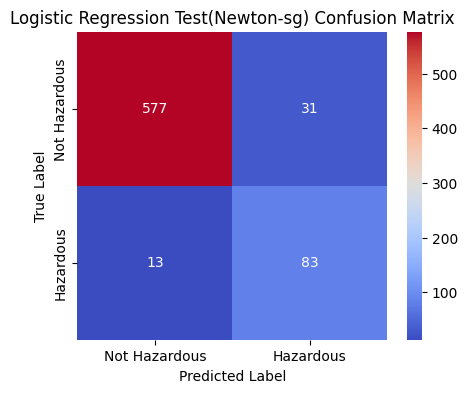


=== Evaluation Report for Logistic Regression Test(Newton-sg) ===
Accuracy : 0.9375
Recall   : 0.8646
Precision: 0.7281
F1 Score : 0.7905

Classification Report:
               precision    recall  f1-score   support

       False       0.98      0.95      0.96       608
        True       0.73      0.86      0.79        96

    accuracy                           0.94       704
   macro avg       0.85      0.91      0.88       704
weighted avg       0.94      0.94      0.94       704


Evaluation Metrics for Logistic Regression Validation(Newton-sg):


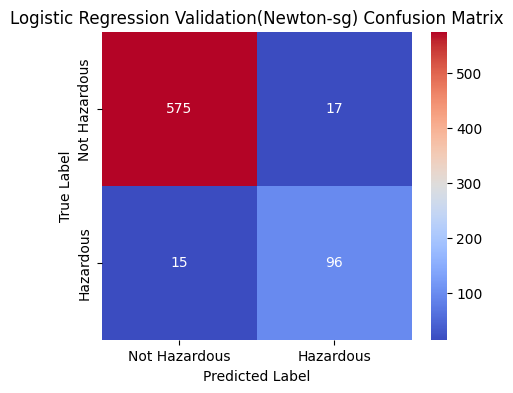


=== Evaluation Report for Logistic Regression Validation(Newton-sg) ===
Accuracy : 0.9545
Recall   : 0.8649
Precision: 0.8496
F1 Score : 0.8571

Classification Report:
               precision    recall  f1-score   support

       False       0.97      0.97      0.97       592
        True       0.85      0.86      0.86       111

    accuracy                           0.95       703
   macro avg       0.91      0.92      0.92       703
weighted avg       0.95      0.95      0.95       703


Evaluation Metrics for Logistic Regression Test(Newton-sg):


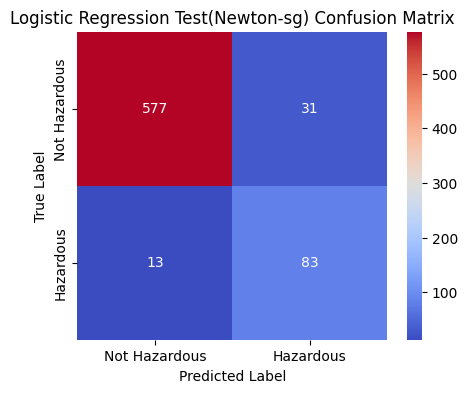


=== Evaluation Report for Logistic Regression Test(Newton-sg) ===
Accuracy : 0.9375
Recall   : 0.8646
Precision: 0.7281
F1 Score : 0.7905

Classification Report:
               precision    recall  f1-score   support

       False       0.98      0.95      0.96       608
        True       0.73      0.86      0.79        96

    accuracy                           0.94       704
   macro avg       0.85      0.91      0.88       704
weighted avg       0.94      0.94      0.94       704


Evaluation Metrics for Logistic Regression Validation(Newton-sg):


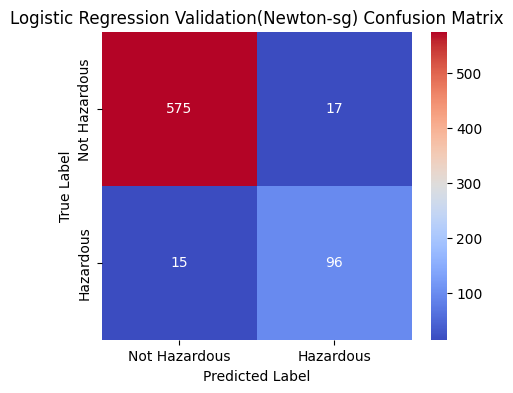


=== Evaluation Report for Logistic Regression Validation(Newton-sg) ===
Accuracy : 0.9545
Recall   : 0.8649
Precision: 0.8496
F1 Score : 0.8571

Classification Report:
               precision    recall  f1-score   support

       False       0.97      0.97      0.97       592
        True       0.85      0.86      0.86       111

    accuracy                           0.95       703
   macro avg       0.91      0.92      0.92       703
weighted avg       0.95      0.95      0.95       703


Evaluation Metrics for Logistic Regression Test(Newton-sg):


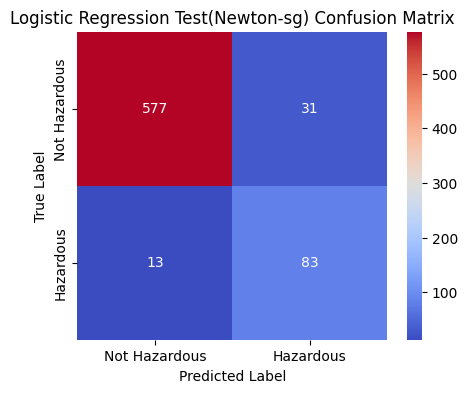


=== Evaluation Report for Logistic Regression Test(Newton-sg) ===
Accuracy : 0.9375
Recall   : 0.8646
Precision: 0.7281
F1 Score : 0.7905

Classification Report:
               precision    recall  f1-score   support

       False       0.98      0.95      0.96       608
        True       0.73      0.86      0.79        96

    accuracy                           0.94       704
   macro avg       0.85      0.91      0.88       704
weighted avg       0.94      0.94      0.94       704


Evaluation Metrics for Logistic Regression Validation(Newton-sg):


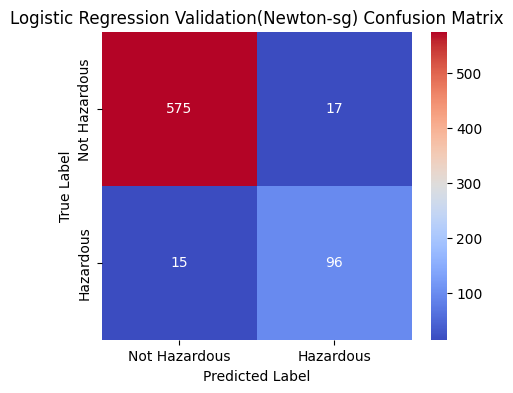


=== Evaluation Report for Logistic Regression Validation(Newton-sg) ===
Accuracy : 0.9545
Recall   : 0.8649
Precision: 0.8496
F1 Score : 0.8571

Classification Report:
               precision    recall  f1-score   support

       False       0.97      0.97      0.97       592
        True       0.85      0.86      0.86       111

    accuracy                           0.95       703
   macro avg       0.91      0.92      0.92       703
weighted avg       0.95      0.95      0.95       703


Evaluation Metrics for Logistic Regression Test(Newton-sg):


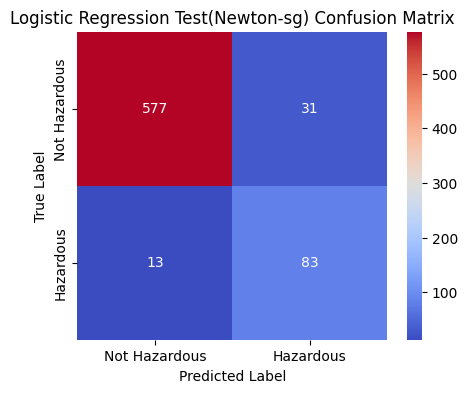


=== Evaluation Report for Logistic Regression Test(Newton-sg) ===
Accuracy : 0.9375
Recall   : 0.8646
Precision: 0.7281
F1 Score : 0.7905

Classification Report:
               precision    recall  f1-score   support

       False       0.98      0.95      0.96       608
        True       0.73      0.86      0.79        96

    accuracy                           0.94       704
   macro avg       0.85      0.91      0.88       704
weighted avg       0.94      0.94      0.94       704



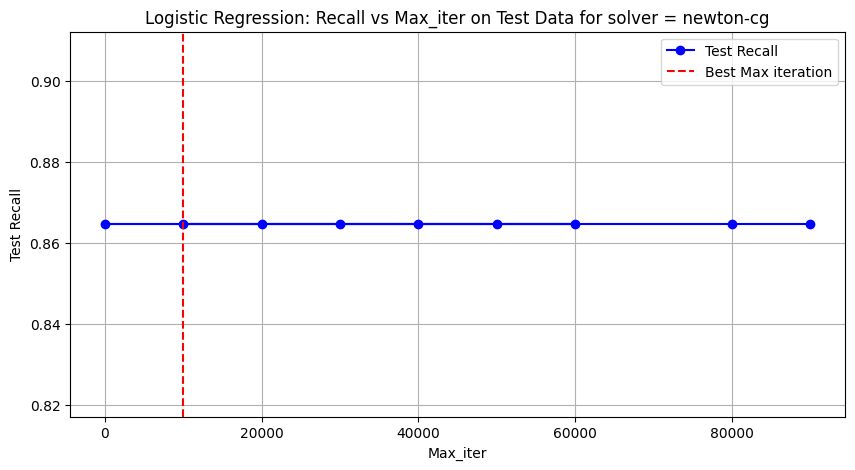

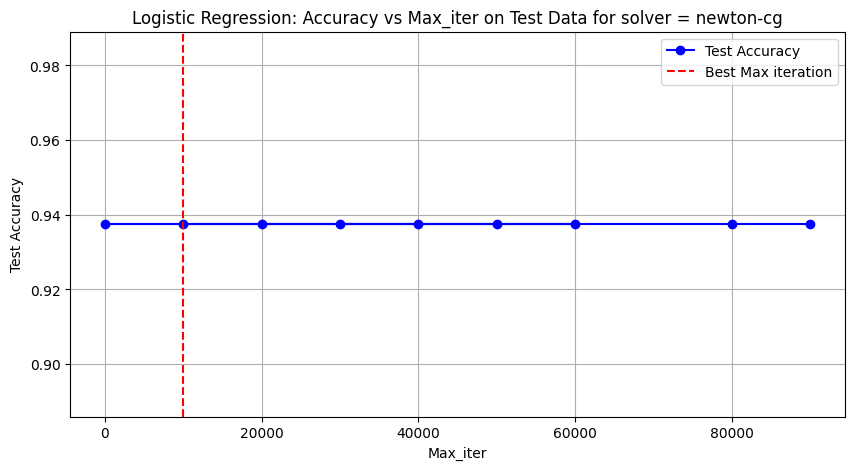

In [38]:
recalls = []
accuracies_nc =[]
for i in range(10000,100000,10000):
    evaluate_model(y_val_pred_log,y_valid,"Logistic Regression Validation(Newton-sg)",i)
    evaluate_model(y_test_pred_log,y_test,"Logistic Regression Test(Newton-sg)",i)
    recall = recall_score(y_test_pred_log,y_test)
    recalls.append(recall)
    accuracy_nc = accuracy_score(y_test_pred_log,y_test)
    accuracies_nc.append(accuracy_nc)
i = [10000,20000,30000,40000,50000,60000,70,80000,90000]
plt.figure(figsize=(10, 5))
plt.plot(i, recalls, marker='o', linestyle='-', color='blue', label="Test Recall")
plt.axvline(x=10000, color='red', linestyle='--', label="Best Max iteration")
plt.xlabel("Max_iter")
plt.ylabel("Test Recall")
plt.title("Logistic Regression: Recall vs Max_iter on Test Data for solver = newton-cg")
plt.legend()
plt.grid()
plt.show()
plt.figure(figsize=(10, 5))
plt.plot(i, accuracies_saga, marker='o', linestyle='-', color='blue', label="Test Accuracy")
plt.axvline(x=10000, color='red', linestyle='--', label="Best Max iteration")
plt.xlabel("Max_iter")
plt.ylabel("Test Accuracy")
plt.title("Logistic Regression: Accuracy vs Max_iter on Test Data for solver = newton-cg")
plt.legend()
plt.grid()
plt.show()

In [39]:
print(logistic_reg)

LogisticRegression(max_iter=10000, solver='newton-cg')


In [40]:
def train_model_random_forest(df_train, df_valid, df_test, target_column="Hazardous"):

    X_train, y_train, X_valid, y_valid, X_test, y_test = x_y_separation(df_train, df_valid, df_test)

    X_train_rf = np.array(X_train)
    X_valid_rf = np.array(X_valid)
    X_test_rf = np.array(X_test)

    y_train_rf = np.array(y_train)
    y_valid_rf = np.array(y_valid)
    y_test_rf = np.array(y_test)

    random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
    random_forest.fit(X_train_rf, y_train_rf)

    y_valid_pred_rf = random_forest.predict(X_valid_rf)
    y_test_pred_rf = random_forest.predict(X_test_rf)

    return random_forest, y_valid_rf, y_test_rf, y_valid_pred_rf, y_test_pred_rf

random_forest, y_valid_rf, y_test_rf, y_valid_pred_rf, y_test_pred_rf = train_model_random_forest(df_train, df_valid, df_test, target_column="Hazardous")



for estimator 100

Evaluation Metrics for Random Forest Validation :


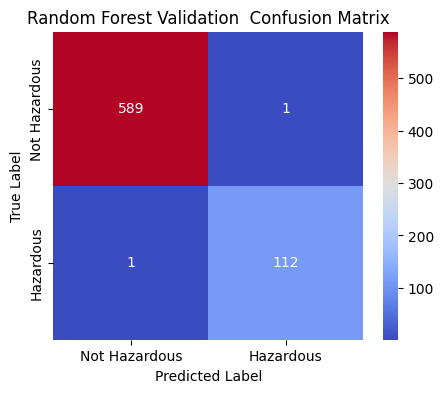


=== Evaluation Report for Random Forest Validation  ===
Accuracy : 0.9972
Recall   : 0.9912
Precision: 0.9912
F1 Score : 0.9912

Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00       590
        True       0.99      0.99      0.99       113

    accuracy                           1.00       703
   macro avg       0.99      0.99      0.99       703
weighted avg       1.00      1.00      1.00       703


Evaluation Metrics for Random Forest Test :


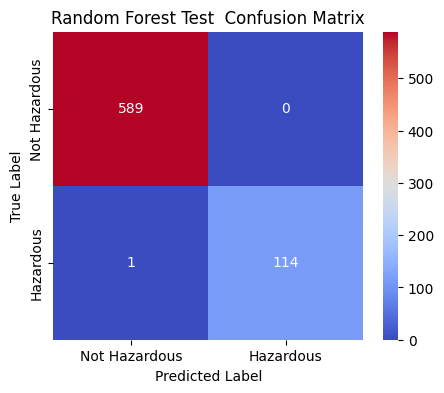


=== Evaluation Report for Random Forest Test  ===
Accuracy : 0.9986
Recall   : 0.9913
Precision: 1.0000
F1 Score : 0.9956

Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00       589
        True       1.00      0.99      1.00       115

    accuracy                           1.00       704
   macro avg       1.00      1.00      1.00       704
weighted avg       1.00      1.00      1.00       704

for estimator 200

Evaluation Metrics for Random Forest Validation :


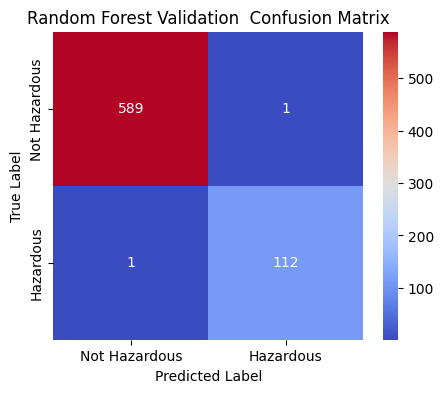


=== Evaluation Report for Random Forest Validation  ===
Accuracy : 0.9972
Recall   : 0.9912
Precision: 0.9912
F1 Score : 0.9912

Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00       590
        True       0.99      0.99      0.99       113

    accuracy                           1.00       703
   macro avg       0.99      0.99      0.99       703
weighted avg       1.00      1.00      1.00       703


Evaluation Metrics for Random Forest Test :


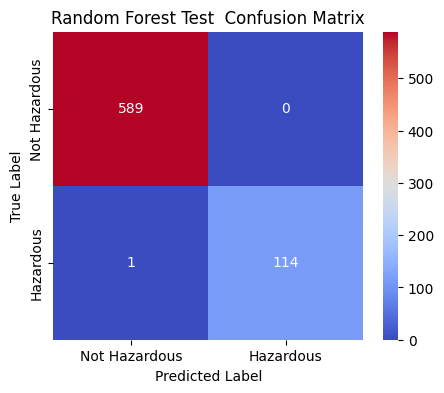


=== Evaluation Report for Random Forest Test  ===
Accuracy : 0.9986
Recall   : 0.9913
Precision: 1.0000
F1 Score : 0.9956

Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00       589
        True       1.00      0.99      1.00       115

    accuracy                           1.00       704
   macro avg       1.00      1.00      1.00       704
weighted avg       1.00      1.00      1.00       704

for estimator 300

Evaluation Metrics for Random Forest Validation :


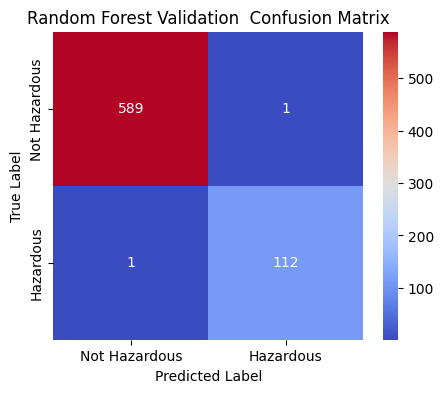


=== Evaluation Report for Random Forest Validation  ===
Accuracy : 0.9972
Recall   : 0.9912
Precision: 0.9912
F1 Score : 0.9912

Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00       590
        True       0.99      0.99      0.99       113

    accuracy                           1.00       703
   macro avg       0.99      0.99      0.99       703
weighted avg       1.00      1.00      1.00       703


Evaluation Metrics for Random Forest Test :


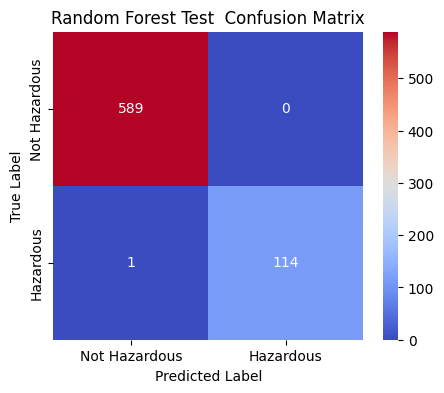


=== Evaluation Report for Random Forest Test  ===
Accuracy : 0.9986
Recall   : 0.9913
Precision: 1.0000
F1 Score : 0.9956

Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00       589
        True       1.00      0.99      1.00       115

    accuracy                           1.00       704
   macro avg       1.00      1.00      1.00       704
weighted avg       1.00      1.00      1.00       704

for estimator 400

Evaluation Metrics for Random Forest Validation :


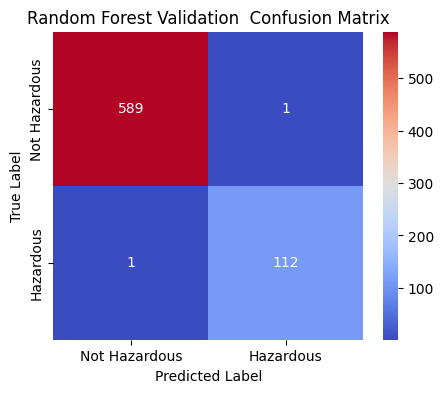


=== Evaluation Report for Random Forest Validation  ===
Accuracy : 0.9972
Recall   : 0.9912
Precision: 0.9912
F1 Score : 0.9912

Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00       590
        True       0.99      0.99      0.99       113

    accuracy                           1.00       703
   macro avg       0.99      0.99      0.99       703
weighted avg       1.00      1.00      1.00       703


Evaluation Metrics for Random Forest Test :


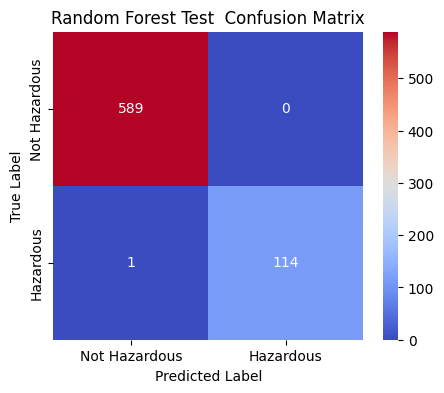


=== Evaluation Report for Random Forest Test  ===
Accuracy : 0.9986
Recall   : 0.9913
Precision: 1.0000
F1 Score : 0.9956

Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00       589
        True       1.00      0.99      1.00       115

    accuracy                           1.00       704
   macro avg       1.00      1.00      1.00       704
weighted avg       1.00      1.00      1.00       704

for estimator 500

Evaluation Metrics for Random Forest Validation :


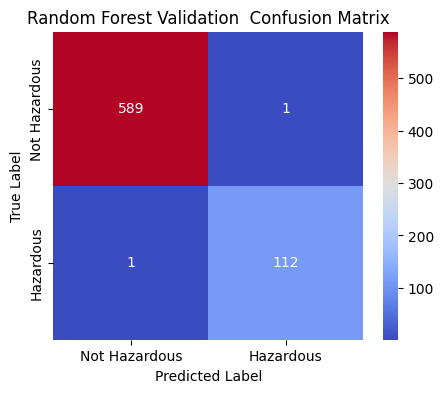


=== Evaluation Report for Random Forest Validation  ===
Accuracy : 0.9972
Recall   : 0.9912
Precision: 0.9912
F1 Score : 0.9912

Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00       590
        True       0.99      0.99      0.99       113

    accuracy                           1.00       703
   macro avg       0.99      0.99      0.99       703
weighted avg       1.00      1.00      1.00       703


Evaluation Metrics for Random Forest Test :


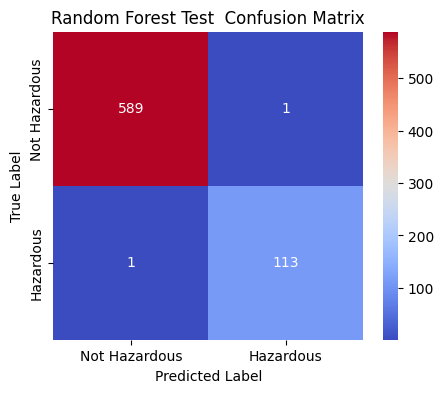


=== Evaluation Report for Random Forest Test  ===
Accuracy : 0.9972
Recall   : 0.9912
Precision: 0.9912
F1 Score : 0.9912

Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00       590
        True       0.99      0.99      0.99       114

    accuracy                           1.00       704
   macro avg       0.99      0.99      0.99       704
weighted avg       1.00      1.00      1.00       704



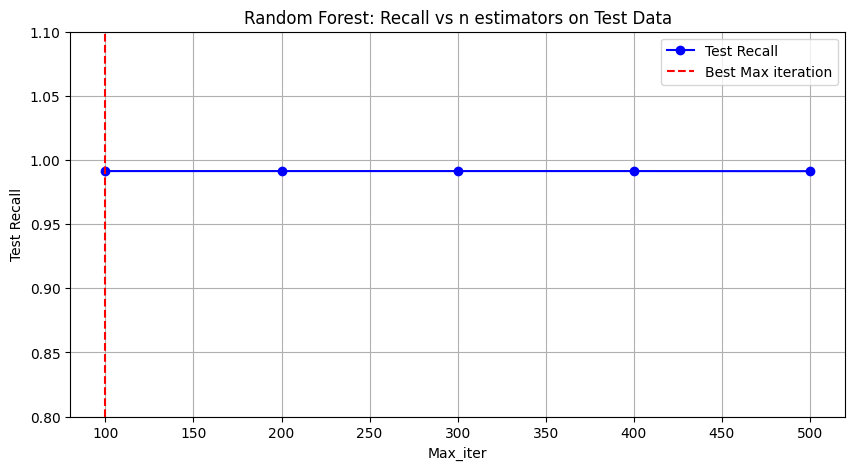

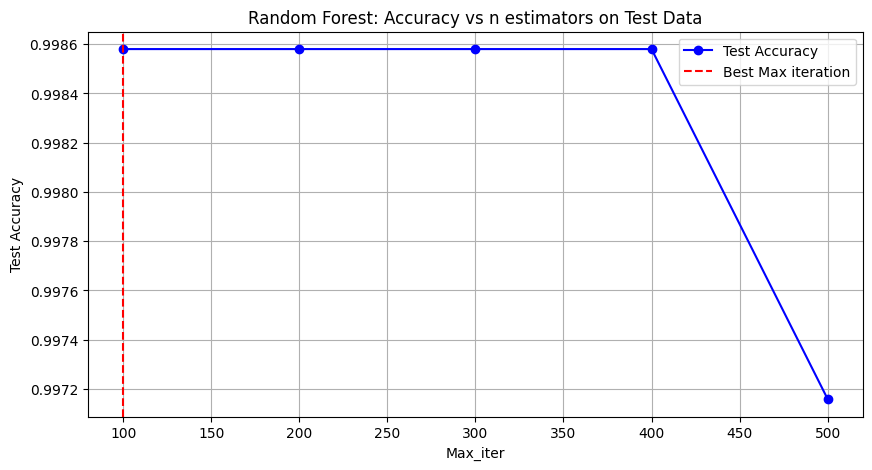

In [41]:
estimators_list = [100,200,300,400,500]
recalls_rf = []
accuracies_rf = []
for estimator in estimators_list:
    def train_model_random_forest(df_train, df_valid, df_test, target_column="Hazardous"):

        X_train, y_train, X_valid, y_valid, X_test, y_test = x_y_separation(df_train, df_valid, df_test)

        X_train_rf = np.array(X_train)
        X_valid_rf = np.array(X_valid)
        X_test_rf = np.array(X_test)

        y_train_rf = np.array(y_train)
        y_valid_rf = np.array(y_valid)
        y_test_rf = np.array(y_test)

        random_forest = RandomForestClassifier(n_estimators=estimator, random_state=42)
        random_forest.fit(X_train_rf, y_train_rf)

        y_valid_pred_rf = random_forest.predict(X_valid_rf)
        y_test_pred_rf = random_forest.predict(X_test_rf)

        return random_forest, y_valid_rf, y_test_rf, y_valid_pred_rf, y_test_pred_rf

    random_forest, y_valid_rf, y_test_rf, y_valid_pred_rf, y_test_pred_rf = train_model_random_forest(df_train, df_valid, df_test, target_column="Hazardous")
    print(f'for estimator {estimator}')
    evaluate_model(y_valid_pred_rf,y_valid,"Random Forest Validation ")
    evaluate_model(y_test_pred_rf,y_test,"Random Forest Test ")
    recall = recall_score(y_test_pred_rf,y_test)
    recalls_rf.append(recall)
    accuracy_rf =accuracy_score(y_test_pred_rf,y_test)
    accuracies_rf.append(accuracy_rf)


plt.figure(figsize=(10, 5))
plt.plot(estimators_list, recalls_rf, marker='o', linestyle='-', color='blue', label="Test Recall")
plt.axvline(x=100, color='red', linestyle='--', label="Best Max iteration")
plt.ylim(0.8,1.1)
plt.xlabel("Max_iter")
plt.ylabel("Test Recall")
plt.title("Random Forest: Recall vs n estimators on Test Data")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(estimators_list, accuracies_rf, marker='o', linestyle='-', color='blue', label="Test Accuracy")
plt.axvline(x=100, color='red', linestyle='--', label="Best Max iteration")
plt.xlabel("Max_iter")
plt.ylabel("Test Accuracy")
plt.title("Random Forest: Accuracy vs n estimators on Test Data")
plt.legend()
plt.grid()
plt.show()




for estimator 100

Evaluation Metrics for Random Forest Validation :


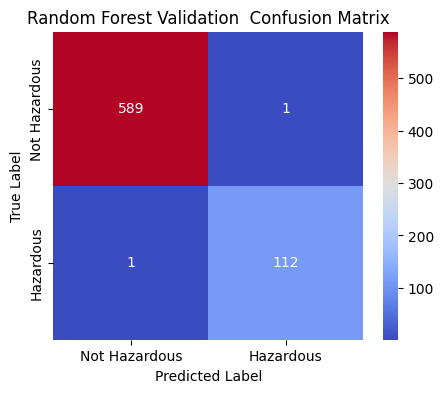


=== Evaluation Report for Random Forest Validation  ===
Accuracy : 0.9972
Recall   : 0.9912
Precision: 0.9912
F1 Score : 0.9912

Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00       590
        True       0.99      0.99      0.99       113

    accuracy                           1.00       703
   macro avg       0.99      0.99      0.99       703
weighted avg       1.00      1.00      1.00       703


Evaluation Metrics for Random Forest Test:


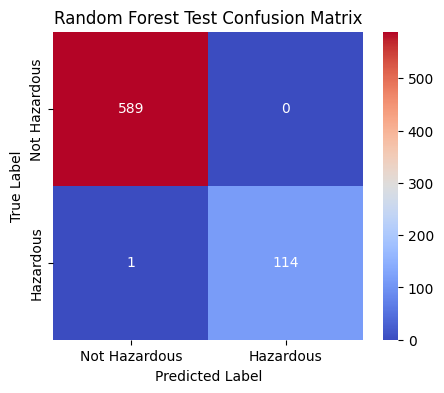


=== Evaluation Report for Random Forest Test ===
Accuracy : 0.9986
Recall   : 0.9913
Precision: 1.0000
F1 Score : 0.9956

Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00       589
        True       1.00      0.99      1.00       115

    accuracy                           1.00       704
   macro avg       1.00      1.00      1.00       704
weighted avg       1.00      1.00      1.00       704

for estimator 150

Evaluation Metrics for Random Forest Validation :


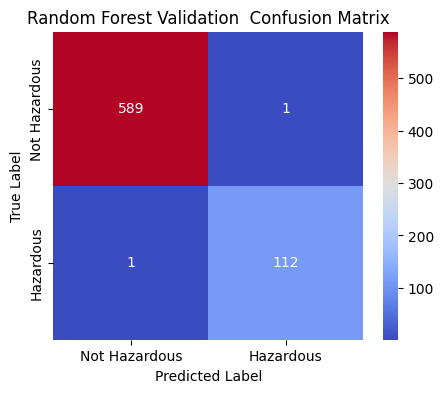


=== Evaluation Report for Random Forest Validation  ===
Accuracy : 0.9972
Recall   : 0.9912
Precision: 0.9912
F1 Score : 0.9912

Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00       590
        True       0.99      0.99      0.99       113

    accuracy                           1.00       703
   macro avg       0.99      0.99      0.99       703
weighted avg       1.00      1.00      1.00       703


Evaluation Metrics for Random Forest Test:


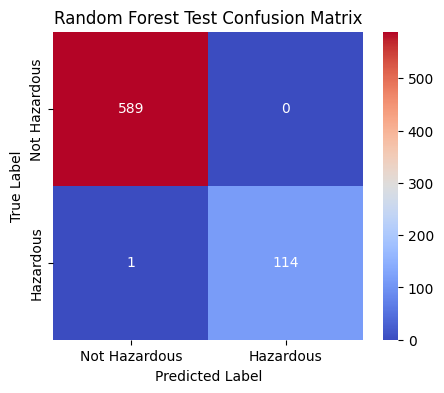


=== Evaluation Report for Random Forest Test ===
Accuracy : 0.9986
Recall   : 0.9913
Precision: 1.0000
F1 Score : 0.9956

Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00       589
        True       1.00      0.99      1.00       115

    accuracy                           1.00       704
   macro avg       1.00      1.00      1.00       704
weighted avg       1.00      1.00      1.00       704

for estimator 200

Evaluation Metrics for Random Forest Validation :


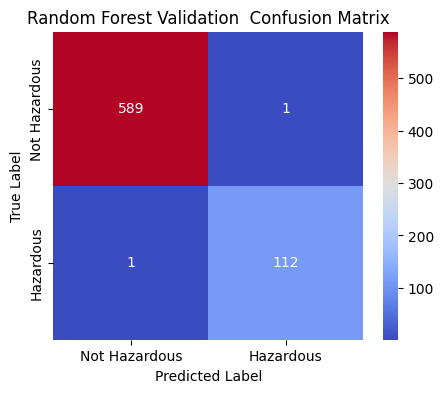


=== Evaluation Report for Random Forest Validation  ===
Accuracy : 0.9972
Recall   : 0.9912
Precision: 0.9912
F1 Score : 0.9912

Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00       590
        True       0.99      0.99      0.99       113

    accuracy                           1.00       703
   macro avg       0.99      0.99      0.99       703
weighted avg       1.00      1.00      1.00       703


Evaluation Metrics for Random Forest Test:


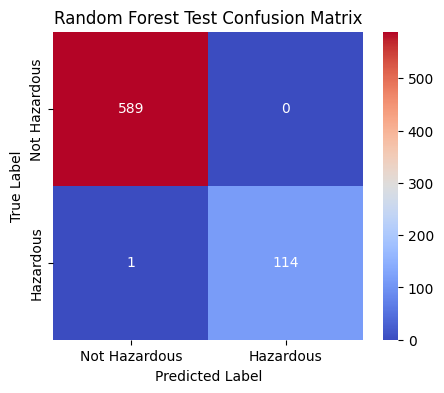


=== Evaluation Report for Random Forest Test ===
Accuracy : 0.9986
Recall   : 0.9913
Precision: 1.0000
F1 Score : 0.9956

Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00       589
        True       1.00      0.99      1.00       115

    accuracy                           1.00       704
   macro avg       1.00      1.00      1.00       704
weighted avg       1.00      1.00      1.00       704

for estimator 250

Evaluation Metrics for Random Forest Validation :


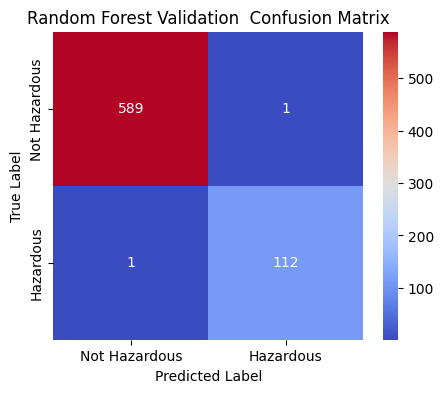


=== Evaluation Report for Random Forest Validation  ===
Accuracy : 0.9972
Recall   : 0.9912
Precision: 0.9912
F1 Score : 0.9912

Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00       590
        True       0.99      0.99      0.99       113

    accuracy                           1.00       703
   macro avg       0.99      0.99      0.99       703
weighted avg       1.00      1.00      1.00       703


Evaluation Metrics for Random Forest Test:


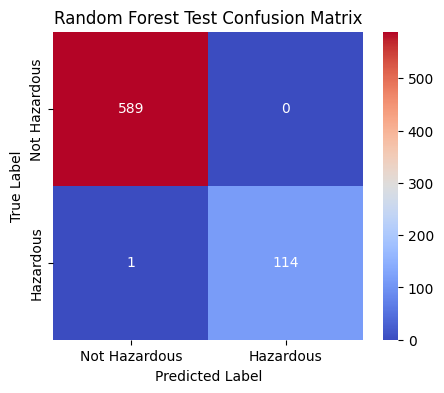


=== Evaluation Report for Random Forest Test ===
Accuracy : 0.9986
Recall   : 0.9913
Precision: 1.0000
F1 Score : 0.9956

Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00       589
        True       1.00      0.99      1.00       115

    accuracy                           1.00       704
   macro avg       1.00      1.00      1.00       704
weighted avg       1.00      1.00      1.00       704

for estimator 300

Evaluation Metrics for Random Forest Validation :


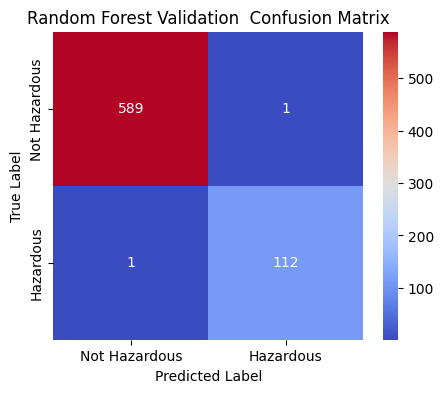


=== Evaluation Report for Random Forest Validation  ===
Accuracy : 0.9972
Recall   : 0.9912
Precision: 0.9912
F1 Score : 0.9912

Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00       590
        True       0.99      0.99      0.99       113

    accuracy                           1.00       703
   macro avg       0.99      0.99      0.99       703
weighted avg       1.00      1.00      1.00       703


Evaluation Metrics for Random Forest Test:


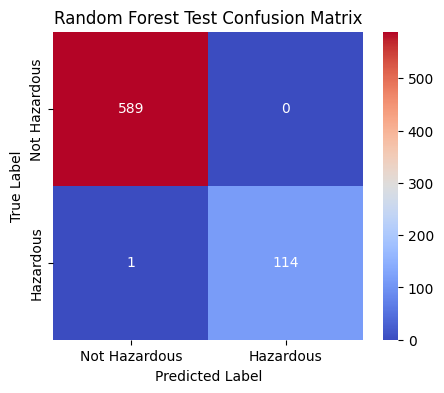


=== Evaluation Report for Random Forest Test ===
Accuracy : 0.9986
Recall   : 0.9913
Precision: 1.0000
F1 Score : 0.9956

Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00       589
        True       1.00      0.99      1.00       115

    accuracy                           1.00       704
   macro avg       1.00      1.00      1.00       704
weighted avg       1.00      1.00      1.00       704

for estimator 350

Evaluation Metrics for Random Forest Validation :


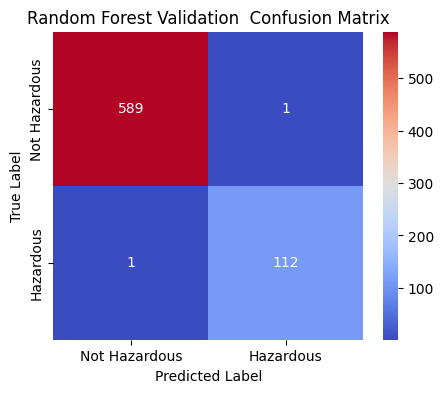


=== Evaluation Report for Random Forest Validation  ===
Accuracy : 0.9972
Recall   : 0.9912
Precision: 0.9912
F1 Score : 0.9912

Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00       590
        True       0.99      0.99      0.99       113

    accuracy                           1.00       703
   macro avg       0.99      0.99      0.99       703
weighted avg       1.00      1.00      1.00       703


Evaluation Metrics for Random Forest Test:


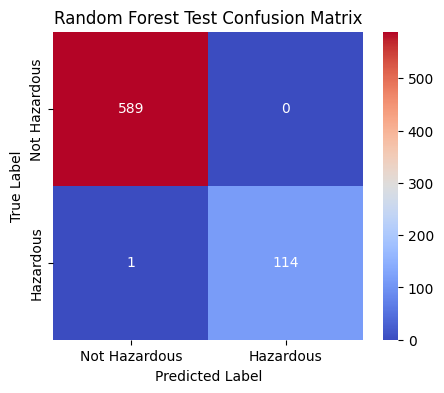


=== Evaluation Report for Random Forest Test ===
Accuracy : 0.9986
Recall   : 0.9913
Precision: 1.0000
F1 Score : 0.9956

Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00       589
        True       1.00      0.99      1.00       115

    accuracy                           1.00       704
   macro avg       1.00      1.00      1.00       704
weighted avg       1.00      1.00      1.00       704

for estimator 400

Evaluation Metrics for Random Forest Validation :


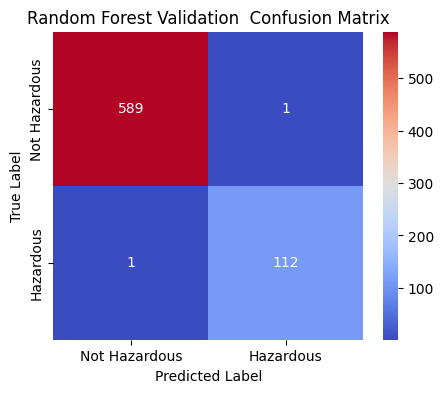


=== Evaluation Report for Random Forest Validation  ===
Accuracy : 0.9972
Recall   : 0.9912
Precision: 0.9912
F1 Score : 0.9912

Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00       590
        True       0.99      0.99      0.99       113

    accuracy                           1.00       703
   macro avg       0.99      0.99      0.99       703
weighted avg       1.00      1.00      1.00       703


Evaluation Metrics for Random Forest Test:


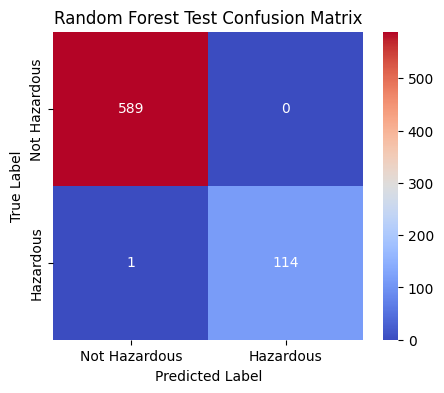


=== Evaluation Report for Random Forest Test ===
Accuracy : 0.9986
Recall   : 0.9913
Precision: 1.0000
F1 Score : 0.9956

Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00       589
        True       1.00      0.99      1.00       115

    accuracy                           1.00       704
   macro avg       1.00      1.00      1.00       704
weighted avg       1.00      1.00      1.00       704

for estimator 450

Evaluation Metrics for Random Forest Validation :


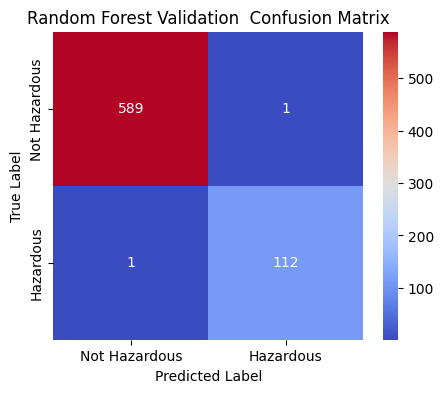


=== Evaluation Report for Random Forest Validation  ===
Accuracy : 0.9972
Recall   : 0.9912
Precision: 0.9912
F1 Score : 0.9912

Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00       590
        True       0.99      0.99      0.99       113

    accuracy                           1.00       703
   macro avg       0.99      0.99      0.99       703
weighted avg       1.00      1.00      1.00       703


Evaluation Metrics for Random Forest Test:


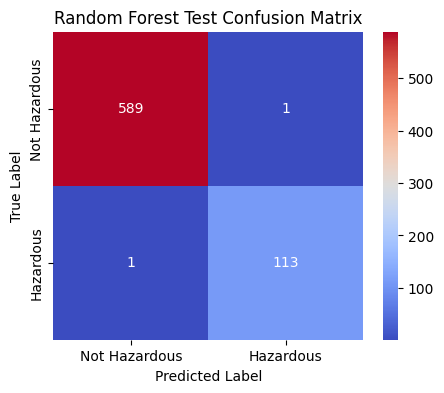


=== Evaluation Report for Random Forest Test ===
Accuracy : 0.9972
Recall   : 0.9912
Precision: 0.9912
F1 Score : 0.9912

Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00       590
        True       0.99      0.99      0.99       114

    accuracy                           1.00       704
   macro avg       0.99      0.99      0.99       704
weighted avg       1.00      1.00      1.00       704



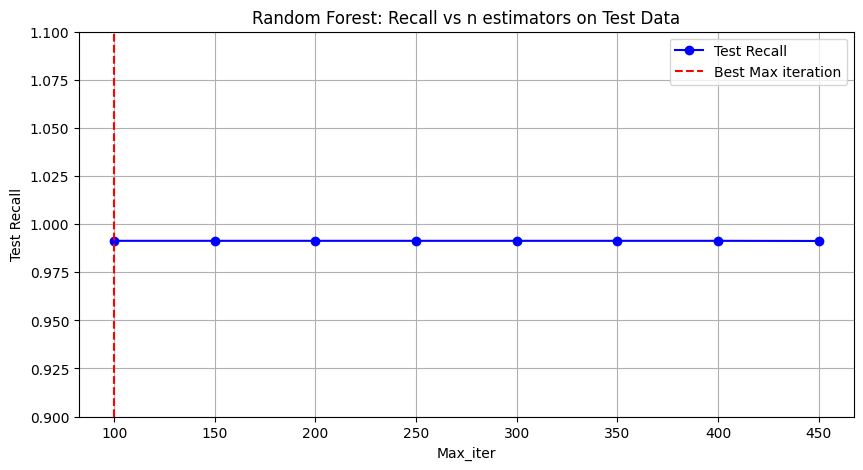

[0.991304347826087, 0.991304347826087, 0.991304347826087, 0.991304347826087, 0.991304347826087, 0.991304347826087, 0.991304347826087, 0.9912280701754386]


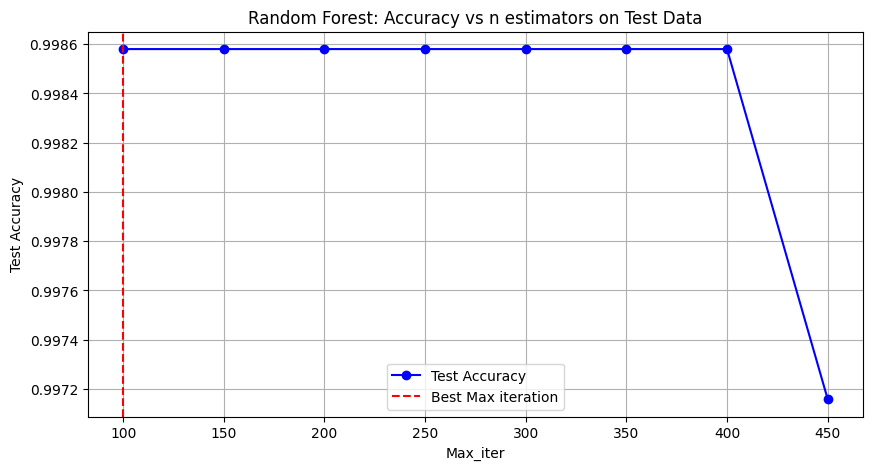

In [42]:
recalls_rfa = []
accuracies_rfa = []
for estimator in range(100,500,50):
    def train_model_random_forest(df_train, df_valid, df_test, target_column="Hazardous"):

        X_train, y_train, X_valid, y_valid, X_test, y_test = x_y_separation(df_train, df_valid, df_test)

        X_train_rf = np.array(X_train)
        X_valid_rf = np.array(X_valid)
        X_test_rf = np.array(X_test)

        y_train_rf = np.array(y_train)
        y_valid_rf = np.array(y_valid)
        y_test_rf = np.array(y_test)

        random_forest = RandomForestClassifier(n_estimators=estimator, random_state=42)
        random_forest.fit(X_train_rf, y_train_rf)

        y_valid_pred_rf = random_forest.predict(X_valid_rf)
        y_test_pred_rf = random_forest.predict(X_test_rf)

        return random_forest, y_valid_rf, y_test_rf, y_valid_pred_rf, y_test_pred_rf

    random_forest, y_valid_rf, y_test_rf, y_valid_pred_rf, y_test_pred_rf = train_model_random_forest(df_train, df_valid, df_test, target_column="Hazardous")
    print(f'for estimator {estimator}')
    evaluate_model(y_valid_pred_rf,y_valid,"Random Forest Validation ")
    evaluate_model(y_test_pred_rf,y_test,"Random Forest Test")
    recalla = recall_score(y_test_pred_rf,y_test)
    recalls_rfa.append(recalla)
    accuracy_rfa = accuracy_score(y_test_pred_rf,y_test)
    accuracies_rfa.append(accuracy_rfa)
estimators_list = [100,150,200,250,300,350,400,450]
plt.figure(figsize=(10, 5))
plt.plot(estimators_list, recalls_rfa, marker='o', linestyle='-', color='blue', label="Test Recall")
plt.axvline(x=100, color='red', linestyle='--', label="Best Max iteration")
plt.xlabel("Max_iter")
plt.ylabel("Test Recall")
plt.ylim(0.9,1.1)
plt.title("Random Forest: Recall vs n estimators on Test Data")
plt.legend()
plt.grid()
plt.show()
print(recalls_rfa)
plt.figure(figsize=(10, 5))
plt.plot(estimators_list, accuracies_rfa, marker='o', linestyle='-', color='blue', label="Test Accuracy")
plt.axvline(x=100, color='red', linestyle='--', label="Best Max iteration")
plt.xlabel("Max_iter")
plt.ylabel("Test Accuracy")
plt.title("Random Forest: Accuracy vs n estimators on Test Data")
plt.legend()
plt.grid()
plt.show()

In [43]:
#best for 400


===== Training Neural Network with hidden layers: [10] =====
Accuracy : 0.1607
Recall   : 1.0000
Precision: 0.1607
F1 Score : 0.2770
Confusion Matrix:
 [[  0 590]
 [  0 113]]


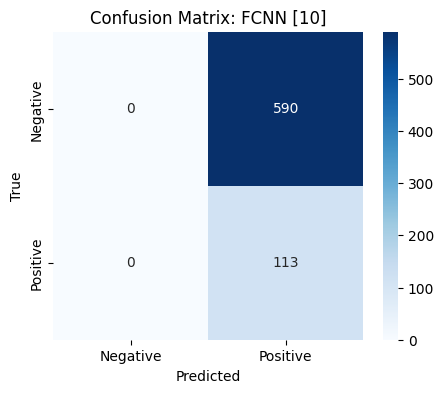


===== Training Neural Network with hidden layers: [31] =====
Accuracy : 0.1607
Recall   : 1.0000
Precision: 0.1607
F1 Score : 0.2770
Confusion Matrix:
 [[  0 590]
 [  0 113]]


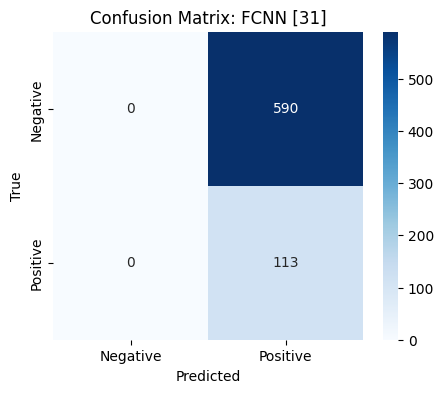


===== Training Neural Network with hidden layers: [40] =====
Accuracy : 0.1607
Recall   : 1.0000
Precision: 0.1607
F1 Score : 0.2770
Confusion Matrix:
 [[  0 590]
 [  0 113]]


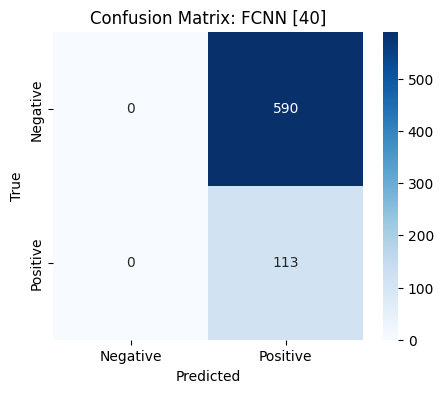


===== Training Neural Network with hidden layers: [100] =====
Accuracy : 0.1607
Recall   : 1.0000
Precision: 0.1607
F1 Score : 0.2770
Confusion Matrix:
 [[  0 590]
 [  0 113]]


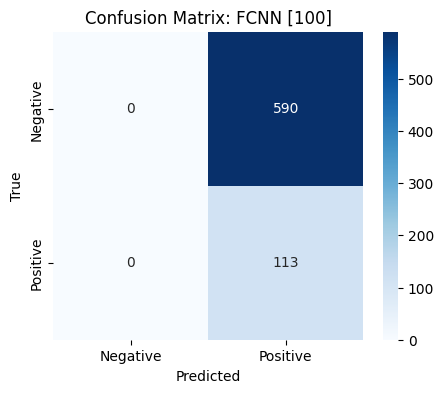


===== Training Neural Network with hidden layers: [64, 16] =====
Accuracy : 0.1607
Recall   : 1.0000
Precision: 0.1607
F1 Score : 0.2770
Confusion Matrix:
 [[  0 590]
 [  0 113]]


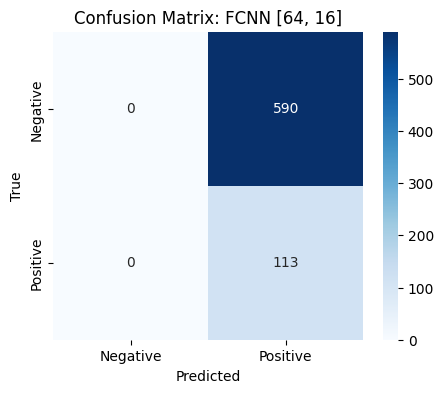


===== Training Neural Network with hidden layers: [256, 32] =====
Accuracy : 0.1607
Recall   : 1.0000
Precision: 0.1607
F1 Score : 0.2770
Confusion Matrix:
 [[  0 590]
 [  0 113]]


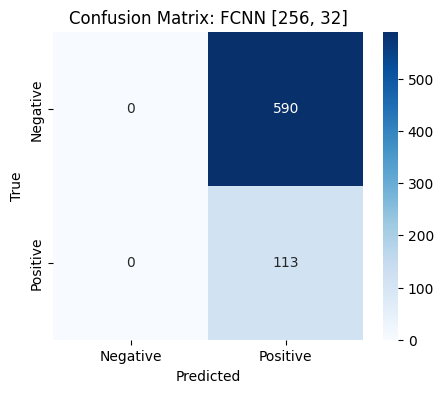


===== Training Neural Network with hidden layers: [512, 64] =====
Accuracy : 0.1607
Recall   : 1.0000
Precision: 0.1607
F1 Score : 0.2770
Confusion Matrix:
 [[  0 590]
 [  0 113]]


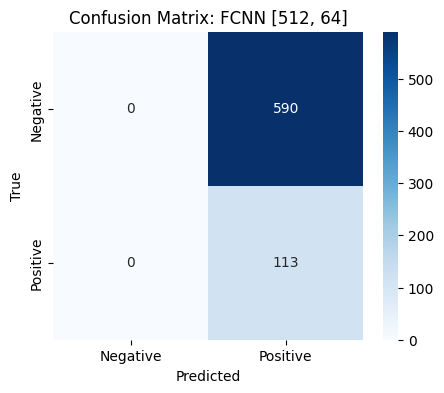


===== Training Neural Network with hidden layers: [256, 128, 64] =====
Accuracy : 0.1607
Recall   : 1.0000
Precision: 0.1607
F1 Score : 0.2770
Confusion Matrix:
 [[  0 590]
 [  0 113]]


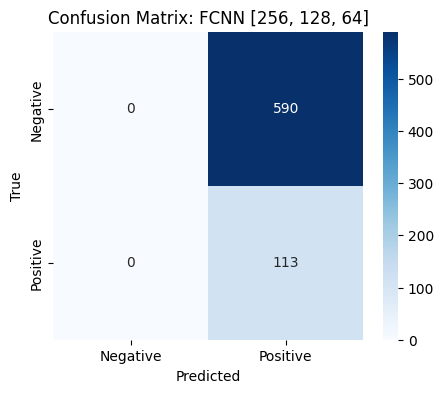


========= Best Neural Net Results =========
Best Accuracy from: [10]
Best Recall from: [10]
Best Precision from: [10]
Best F1-score from: [10]


In [44]:
def train_model_fcnn(df_train, df_valid, df_test, target_column="Hazardous",
                     num_epochs=2000, lr=0.0001,
                     hidden_layers_list=[[10],[31],[40],[100],[64,16],[256,32],[512,64],[256,128,64]]):

    import torch
    import torch.nn as nn
    import torch.optim as optim
    import numpy as np
    import pandas as pd
    from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
    import seaborn as sns
    import matplotlib.pyplot as plt
    recalls_fcnn =[]
    # Separate input features and target variable for train, validation, and test
    X_train, y_train, X_valid, y_valid, X_test, y_test = x_y_separation(df_train, df_valid, df_test)

    # Convert data to torch tensors
    X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
    X_valid_tensor = torch.tensor(X_valid.values, dtype=torch.float32)
    X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)

    y_train_tensor = torch.tensor(y_train.values.reshape(-1, 1), dtype=torch.float32)
    y_valid_tensor = torch.tensor(y_valid.values.reshape(-1, 1), dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test.values.reshape(-1, 1), dtype=torch.float32)

    # Compute pos_weight for class imbalance
    num_pos = (y_train_tensor == 1).sum()
    num_neg = (y_train_tensor == 0).sum()
    pos_weight_value = num_neg / num_pos
    pos_weight = torch.tensor([pos_weight_value], dtype=torch.float32)

    metrics_summary = []

    for hidden_layers in hidden_layers_list:
        print(f"\n===== Training Neural Network with hidden layers: {hidden_layers} =====")
        model = NeuralNet(input_size=X_train_tensor.shape[1], hidden_layers=hidden_layers)
        criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
        optimizer = optim.SGD(model.parameters(), lr=lr)
        loss_history = []

        # Training the model
        for epoch in range(num_epochs):
            model.train()
            optimizer.zero_grad()
            outputs = model(X_train_tensor)
            loss = criterion(outputs, y_train_tensor)
            loss.backward()
            optimizer.step()
            loss_history.append(loss.item())

        # Evaluate the model on validation and test sets
        model.eval()
        with torch.no_grad():
            y_valid_logits = model(X_valid_tensor)
            y_test_logits = model(X_test_tensor)

        # Apply sigmoid manually
        y_valid_probs = torch.sigmoid(y_valid_logits).numpy()
        y_test_probs = torch.sigmoid(y_test_logits).numpy()

        y_valid_pred_bin = (y_valid_probs > 0.5).astype(int)
        y_test_pred_bin = (y_test_probs > 0.5).astype(int)

        # Metrics Calculation
        acc = accuracy_score(y_valid_tensor.numpy(), y_valid_pred_bin)
        rec = recall_score(y_valid_tensor.numpy(), y_valid_pred_bin, zero_division=0)
        prec = precision_score(y_valid_tensor.numpy(), y_valid_pred_bin, zero_division=0)
        f1 = f1_score(y_valid_tensor.numpy(), y_valid_pred_bin, zero_division=0)
        recalls_rf.append(rec)

        print(f"Accuracy : {acc:.4f}")
        print(f"Recall   : {rec:.4f}")
        print(f"Precision: {prec:.4f}")
        print(f"F1 Score : {f1:.4f}")
        print("Confusion Matrix:\n", confusion_matrix(y_valid_tensor.numpy(), y_valid_pred_bin))

        # Plot confusion matrix heatmap
        cm = confusion_matrix(y_valid_tensor.numpy(), y_valid_pred_bin)
        plt.figure(figsize=(5, 4))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
        plt.xlabel("Predicted")
        plt.ylabel("True")
        plt.title(f"Confusion Matrix: FCNN {hidden_layers}")
        plt.show()

        # Store metrics and model
        metrics_summary.append({
            'hidden_layers': hidden_layers,
            'accuracy': acc,
            'recall': rec,
            'precision': prec,
            'f1_score': f1,
            'model': model,
            'y_valid_true': y_valid_tensor.numpy(),
            'y_valid_pred': y_valid_pred_bin,
            'y_test_true': y_test_tensor.numpy(),
            'y_test_pred': y_test_pred_bin
        })

    # Create DataFrame to summarize results
    metrics_df = pd.DataFrame([{
        'hidden_layers': str(m['hidden_layers']),
        'accuracy': m['accuracy'],
        'recall': m['recall'],
        'precision': m['precision'],
        'f1_score': m['f1_score']
    } for m in metrics_summary])

    print("\n========= Best Neural Net Results =========")
    print("Best Accuracy from:", metrics_df.loc[metrics_df['accuracy'].idxmax(), 'hidden_layers'])
    print("Best Recall from:", metrics_df.loc[metrics_df['recall'].idxmax(), 'hidden_layers'])
    print("Best Precision from:", metrics_df.loc[metrics_df['precision'].idxmax(), 'hidden_layers'])
    print("Best F1-score from:", metrics_df.loc[metrics_df['f1_score'].idxmax(), 'hidden_layers'])

    # Return the best model if needed
    best_model_index = metrics_df['f1_score'].idxmax()
    best_model = metrics_summary[best_model_index]
    return best_model['model'], best_model['y_valid_true'], best_model['y_test_true'], best_model['y_valid_pred'], best_model['y_test_pred'],recalls_fcnn

best_model,best_model_yvt,best_model_ytt,best_model_yvp,best_model_ytp,recalls_fcnn = train_model_fcnn(df_train,df_valid,df_test)


1

Evaluation Metrics for SVC poly validation:


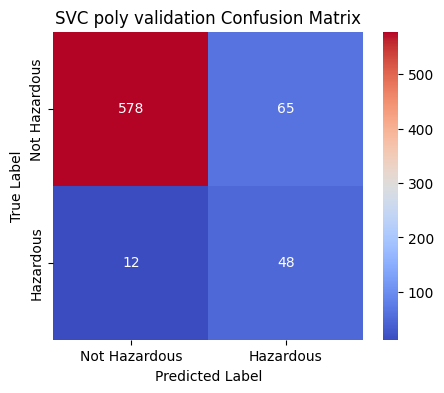


=== Evaluation Report for SVC poly validation ===
Accuracy : 0.8905
Recall   : 0.8000
Precision: 0.4248
F1 Score : 0.5549

Classification Report:
               precision    recall  f1-score   support

       False       0.98      0.90      0.94       643
        True       0.42      0.80      0.55        60

    accuracy                           0.89       703
   macro avg       0.70      0.85      0.75       703
weighted avg       0.93      0.89      0.90       703


Evaluation Metrics for SVC poly Test:


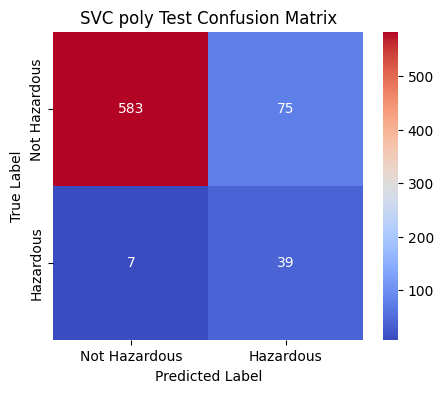


=== Evaluation Report for SVC poly Test ===
Accuracy : 0.8835
Recall   : 0.8478
Precision: 0.3421
F1 Score : 0.4875

Classification Report:
               precision    recall  f1-score   support

       False       0.99      0.89      0.93       658
        True       0.34      0.85      0.49        46

    accuracy                           0.88       704
   macro avg       0.67      0.87      0.71       704
weighted avg       0.95      0.88      0.91       704

2

Evaluation Metrics for SVC poly validation:


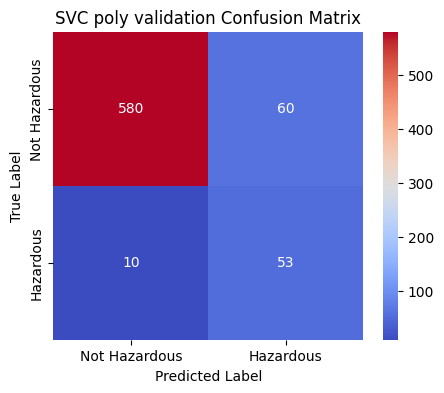


=== Evaluation Report for SVC poly validation ===
Accuracy : 0.9004
Recall   : 0.8413
Precision: 0.4690
F1 Score : 0.6023

Classification Report:
               precision    recall  f1-score   support

       False       0.98      0.91      0.94       640
        True       0.47      0.84      0.60        63

    accuracy                           0.90       703
   macro avg       0.73      0.87      0.77       703
weighted avg       0.94      0.90      0.91       703


Evaluation Metrics for SVC poly Test:


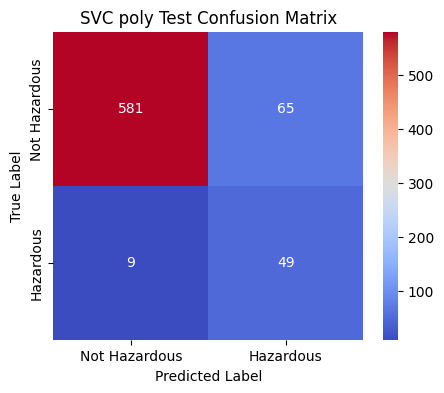


=== Evaluation Report for SVC poly Test ===
Accuracy : 0.8949
Recall   : 0.8448
Precision: 0.4298
F1 Score : 0.5698

Classification Report:
               precision    recall  f1-score   support

       False       0.98      0.90      0.94       646
        True       0.43      0.84      0.57        58

    accuracy                           0.89       704
   macro avg       0.71      0.87      0.75       704
weighted avg       0.94      0.89      0.91       704

3

Evaluation Metrics for SVC poly validation:


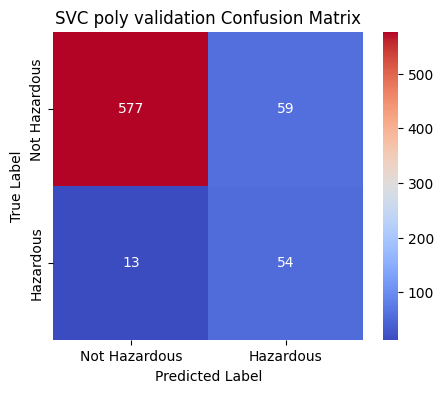


=== Evaluation Report for SVC poly validation ===
Accuracy : 0.8976
Recall   : 0.8060
Precision: 0.4779
F1 Score : 0.6000

Classification Report:
               precision    recall  f1-score   support

       False       0.98      0.91      0.94       636
        True       0.48      0.81      0.60        67

    accuracy                           0.90       703
   macro avg       0.73      0.86      0.77       703
weighted avg       0.93      0.90      0.91       703


Evaluation Metrics for SVC poly Test:


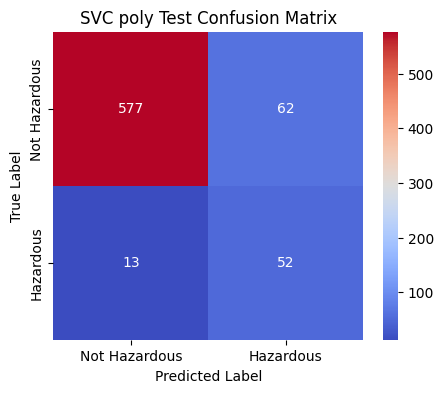


=== Evaluation Report for SVC poly Test ===
Accuracy : 0.8935
Recall   : 0.8000
Precision: 0.4561
F1 Score : 0.5810

Classification Report:
               precision    recall  f1-score   support

       False       0.98      0.90      0.94       639
        True       0.46      0.80      0.58        65

    accuracy                           0.89       704
   macro avg       0.72      0.85      0.76       704
weighted avg       0.93      0.89      0.91       704

4

Evaluation Metrics for SVC poly validation:


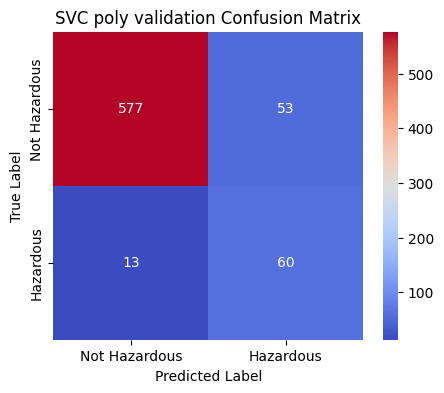


=== Evaluation Report for SVC poly validation ===
Accuracy : 0.9061
Recall   : 0.8219
Precision: 0.5310
F1 Score : 0.6452

Classification Report:
               precision    recall  f1-score   support

       False       0.98      0.92      0.95       630
        True       0.53      0.82      0.65        73

    accuracy                           0.91       703
   macro avg       0.75      0.87      0.80       703
weighted avg       0.93      0.91      0.91       703


Evaluation Metrics for SVC poly Test:


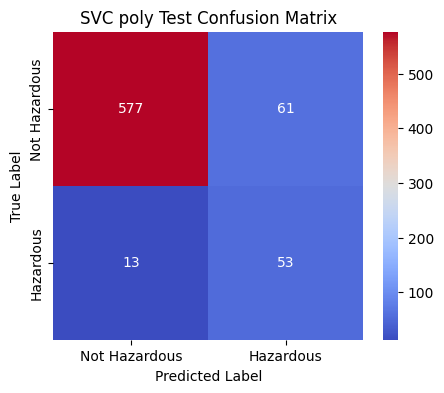


=== Evaluation Report for SVC poly Test ===
Accuracy : 0.8949
Recall   : 0.8030
Precision: 0.4649
F1 Score : 0.5889

Classification Report:
               precision    recall  f1-score   support

       False       0.98      0.90      0.94       638
        True       0.46      0.80      0.59        66

    accuracy                           0.89       704
   macro avg       0.72      0.85      0.76       704
weighted avg       0.93      0.89      0.91       704

5

Evaluation Metrics for SVC poly validation:


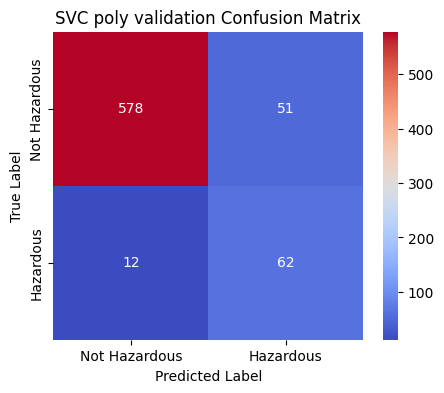


=== Evaluation Report for SVC poly validation ===
Accuracy : 0.9104
Recall   : 0.8378
Precision: 0.5487
F1 Score : 0.6631

Classification Report:
               precision    recall  f1-score   support

       False       0.98      0.92      0.95       629
        True       0.55      0.84      0.66        74

    accuracy                           0.91       703
   macro avg       0.76      0.88      0.81       703
weighted avg       0.93      0.91      0.92       703


Evaluation Metrics for SVC poly Test:


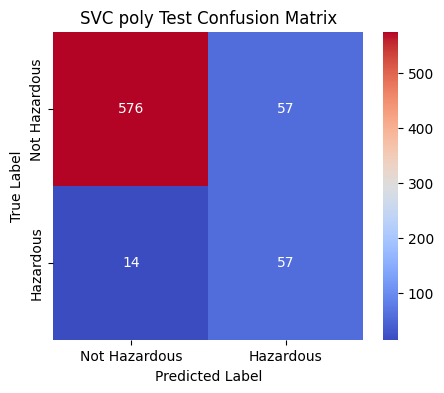


=== Evaluation Report for SVC poly Test ===
Accuracy : 0.8991
Recall   : 0.8028
Precision: 0.5000
F1 Score : 0.6162

Classification Report:
               precision    recall  f1-score   support

       False       0.98      0.91      0.94       633
        True       0.50      0.80      0.62        71

    accuracy                           0.90       704
   macro avg       0.74      0.86      0.78       704
weighted avg       0.93      0.90      0.91       704

6

Evaluation Metrics for SVC poly validation:


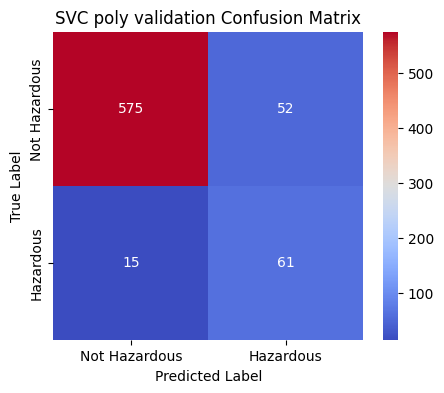


=== Evaluation Report for SVC poly validation ===
Accuracy : 0.9047
Recall   : 0.8026
Precision: 0.5398
F1 Score : 0.6455

Classification Report:
               precision    recall  f1-score   support

       False       0.97      0.92      0.94       627
        True       0.54      0.80      0.65        76

    accuracy                           0.90       703
   macro avg       0.76      0.86      0.80       703
weighted avg       0.93      0.90      0.91       703


Evaluation Metrics for SVC poly Test:


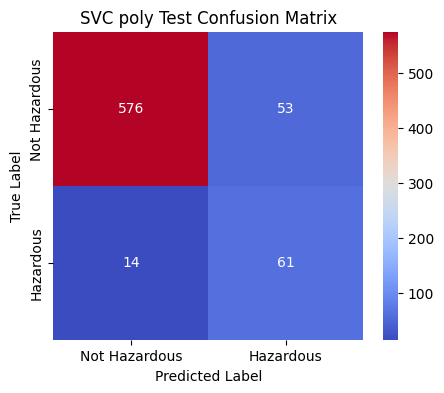


=== Evaluation Report for SVC poly Test ===
Accuracy : 0.9048
Recall   : 0.8133
Precision: 0.5351
F1 Score : 0.6455

Classification Report:
               precision    recall  f1-score   support

       False       0.98      0.92      0.95       629
        True       0.54      0.81      0.65        75

    accuracy                           0.90       704
   macro avg       0.76      0.86      0.80       704
weighted avg       0.93      0.90      0.91       704

7

Evaluation Metrics for SVC poly validation:


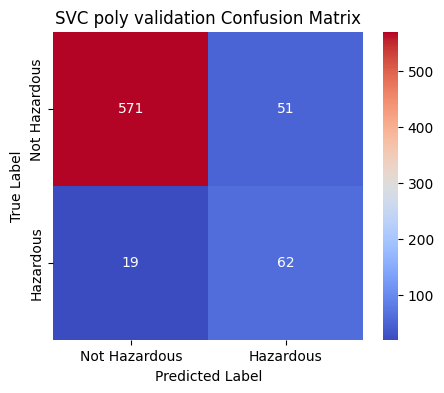


=== Evaluation Report for SVC poly validation ===
Accuracy : 0.9004
Recall   : 0.7654
Precision: 0.5487
F1 Score : 0.6392

Classification Report:
               precision    recall  f1-score   support

       False       0.97      0.92      0.94       622
        True       0.55      0.77      0.64        81

    accuracy                           0.90       703
   macro avg       0.76      0.84      0.79       703
weighted avg       0.92      0.90      0.91       703


Evaluation Metrics for SVC poly Test:


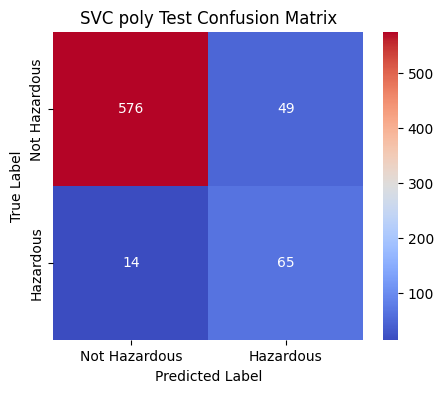


=== Evaluation Report for SVC poly Test ===
Accuracy : 0.9105
Recall   : 0.8228
Precision: 0.5702
F1 Score : 0.6736

Classification Report:
               precision    recall  f1-score   support

       False       0.98      0.92      0.95       625
        True       0.57      0.82      0.67        79

    accuracy                           0.91       704
   macro avg       0.77      0.87      0.81       704
weighted avg       0.93      0.91      0.92       704

8

Evaluation Metrics for SVC poly validation:


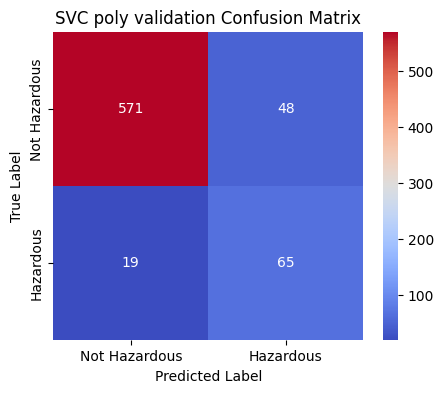


=== Evaluation Report for SVC poly validation ===
Accuracy : 0.9047
Recall   : 0.7738
Precision: 0.5752
F1 Score : 0.6599

Classification Report:
               precision    recall  f1-score   support

       False       0.97      0.92      0.94       619
        True       0.58      0.77      0.66        84

    accuracy                           0.90       703
   macro avg       0.77      0.85      0.80       703
weighted avg       0.92      0.90      0.91       703


Evaluation Metrics for SVC poly Test:


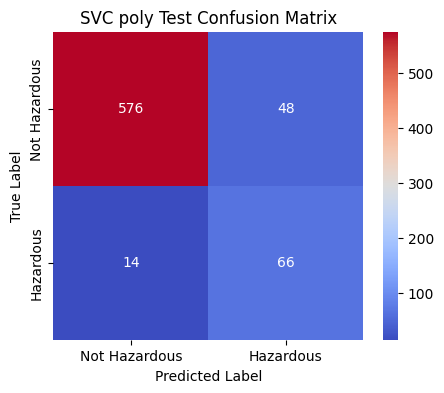


=== Evaluation Report for SVC poly Test ===
Accuracy : 0.9119
Recall   : 0.8250
Precision: 0.5789
F1 Score : 0.6804

Classification Report:
               precision    recall  f1-score   support

       False       0.98      0.92      0.95       624
        True       0.58      0.82      0.68        80

    accuracy                           0.91       704
   macro avg       0.78      0.87      0.81       704
weighted avg       0.93      0.91      0.92       704

9

Evaluation Metrics for SVC poly validation:


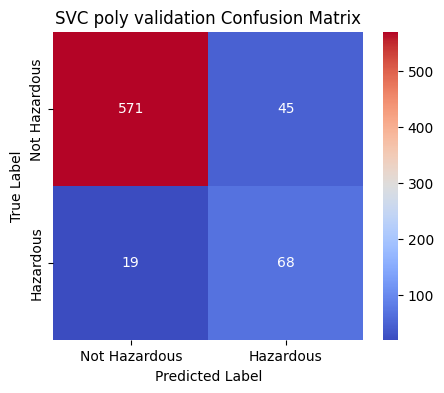


=== Evaluation Report for SVC poly validation ===
Accuracy : 0.9090
Recall   : 0.7816
Precision: 0.6018
F1 Score : 0.6800

Classification Report:
               precision    recall  f1-score   support

       False       0.97      0.93      0.95       616
        True       0.60      0.78      0.68        87

    accuracy                           0.91       703
   macro avg       0.78      0.85      0.81       703
weighted avg       0.92      0.91      0.91       703


Evaluation Metrics for SVC poly Test:


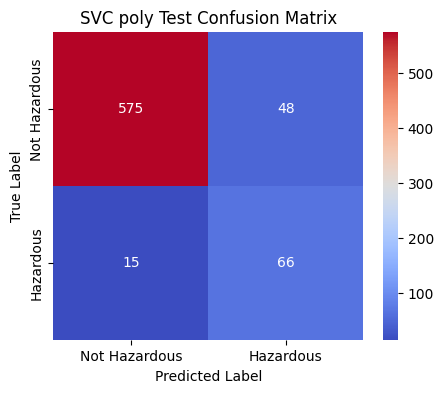


=== Evaluation Report for SVC poly Test ===
Accuracy : 0.9105
Recall   : 0.8148
Precision: 0.5789
F1 Score : 0.6769

Classification Report:
               precision    recall  f1-score   support

       False       0.97      0.92      0.95       623
        True       0.58      0.81      0.68        81

    accuracy                           0.91       704
   macro avg       0.78      0.87      0.81       704
weighted avg       0.93      0.91      0.92       704



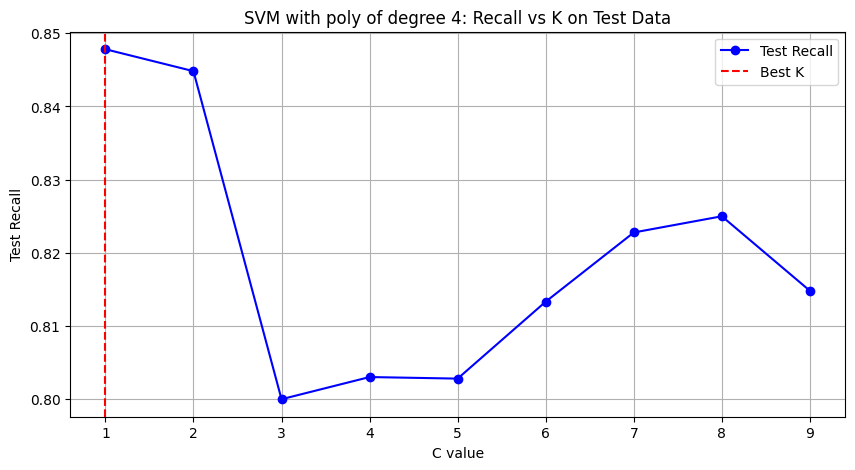

Maximum Accuracy = 0.9119318181818182 at C = 8


In [45]:
best_accuracy = -999
recalls_sp = []
for i in range(1,10):
  def train_model_svc_poly(df_train, df_valid, df_test, target_column="Hazardous"):
    X_train, y_train, X_valid, y_valid, X_test, y_test = x_y_separation(df_train, df_valid, df_test)
    model = SVC(kernel='poly', degree=4, C=i, gamma='scale')
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)
    y_val_pred = model.predict(X_valid)

    return model, y_valid, y_test, y_val_pred, y_test_pred
  model, y_valid, y_test, y_val_pred_sp, y_test_pred_sp = train_model_svc_poly(df_train, df_valid, df_test)
  print(i)
  evaluate_model(y_val_pred_sp,y_valid,"SVC poly validation")
  evaluate_model(y_test_pred_sp,y_test,"SVC poly Test")
  recall_sp = recall_score(y_test_pred_sp,y_test)
  recalls_sp.append(recall_sp)
  best_accuracy_a = accuracy_score(y_test, y_test_pred_sp)
  if(best_accuracy_a >= best_accuracy):
    max_accuracy = best_accuracy_a
    number = i
  best_accuracy = best_accuracy_a
i = [1,2,3,4,5,6,7,8,9]
plt.figure(figsize=(10, 5))
plt.plot(i, recalls_sp, marker='o', linestyle='-', color='blue', label="Test Recall")
plt.axvline(x=1, color='red', linestyle='--', label="Best K")
plt.xlabel("C value")
plt.ylabel("Test Recall")
plt.title("SVM with poly of degree 4: Recall vs K on Test Data")
plt.legend()
plt.grid()
plt.show()
print(f'Maximum Accuracy = {max_accuracy} at C = {number}')



3

Evaluation Metrics for SVC poly Validation Degree:


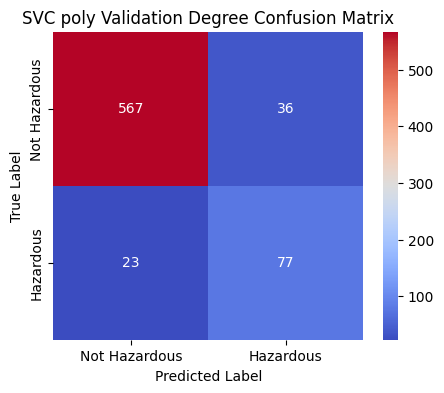


=== Evaluation Report for SVC poly Validation Degree ===
Accuracy : 0.9161
Recall   : 0.7700
Precision: 0.6814
F1 Score : 0.7230

Classification Report:
               precision    recall  f1-score   support

       False       0.96      0.94      0.95       603
        True       0.68      0.77      0.72       100

    accuracy                           0.92       703
   macro avg       0.82      0.86      0.84       703
weighted avg       0.92      0.92      0.92       703


Evaluation Metrics for SVC poly Test Degree:


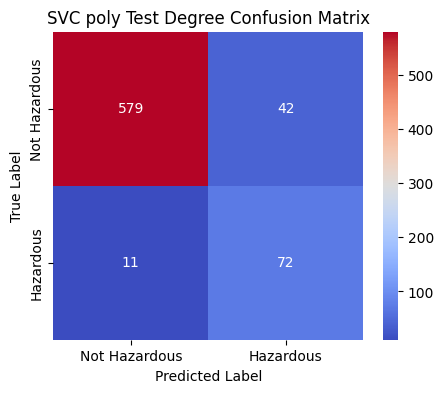


=== Evaluation Report for SVC poly Test Degree ===
Accuracy : 0.9247
Recall   : 0.8675
Precision: 0.6316
F1 Score : 0.7310

Classification Report:
               precision    recall  f1-score   support

       False       0.98      0.93      0.96       621
        True       0.63      0.87      0.73        83

    accuracy                           0.92       704
   macro avg       0.81      0.90      0.84       704
weighted avg       0.94      0.92      0.93       704

4

Evaluation Metrics for SVC poly Validation Degree:


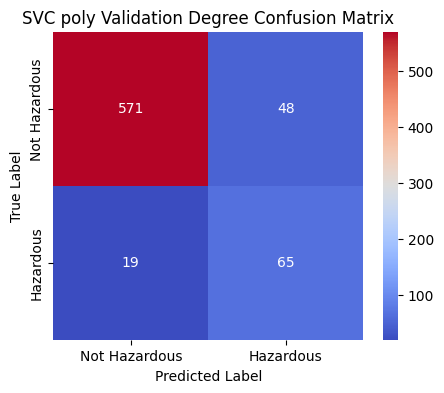


=== Evaluation Report for SVC poly Validation Degree ===
Accuracy : 0.9047
Recall   : 0.7738
Precision: 0.5752
F1 Score : 0.6599

Classification Report:
               precision    recall  f1-score   support

       False       0.97      0.92      0.94       619
        True       0.58      0.77      0.66        84

    accuracy                           0.90       703
   macro avg       0.77      0.85      0.80       703
weighted avg       0.92      0.90      0.91       703


Evaluation Metrics for SVC poly Test Degree:


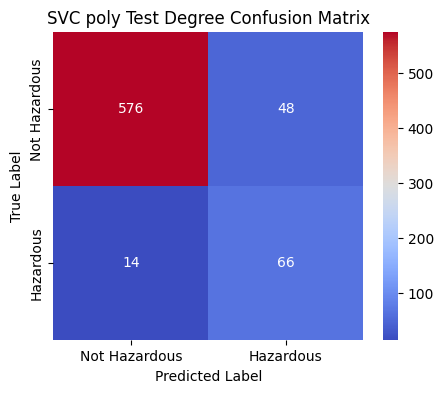


=== Evaluation Report for SVC poly Test Degree ===
Accuracy : 0.9119
Recall   : 0.8250
Precision: 0.5789
F1 Score : 0.6804

Classification Report:
               precision    recall  f1-score   support

       False       0.98      0.92      0.95       624
        True       0.58      0.82      0.68        80

    accuracy                           0.91       704
   macro avg       0.78      0.87      0.81       704
weighted avg       0.93      0.91      0.92       704

5

Evaluation Metrics for SVC poly Validation Degree:


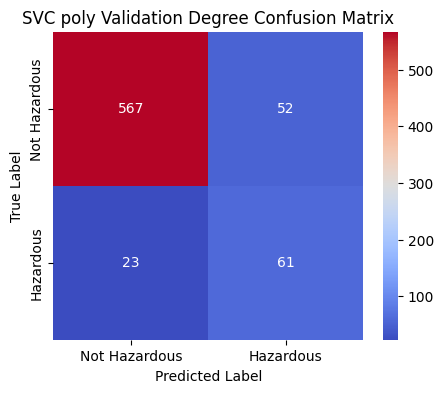


=== Evaluation Report for SVC poly Validation Degree ===
Accuracy : 0.8933
Recall   : 0.7262
Precision: 0.5398
F1 Score : 0.6193

Classification Report:
               precision    recall  f1-score   support

       False       0.96      0.92      0.94       619
        True       0.54      0.73      0.62        84

    accuracy                           0.89       703
   macro avg       0.75      0.82      0.78       703
weighted avg       0.91      0.89      0.90       703


Evaluation Metrics for SVC poly Test Degree:


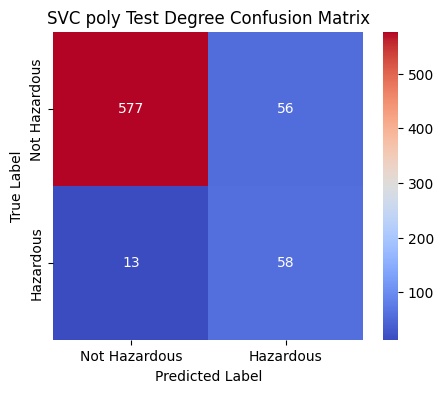


=== Evaluation Report for SVC poly Test Degree ===
Accuracy : 0.9020
Recall   : 0.8169
Precision: 0.5088
F1 Score : 0.6270

Classification Report:
               precision    recall  f1-score   support

       False       0.98      0.91      0.94       633
        True       0.51      0.82      0.63        71

    accuracy                           0.90       704
   macro avg       0.74      0.86      0.79       704
weighted avg       0.93      0.90      0.91       704

6

Evaluation Metrics for SVC poly Validation Degree:


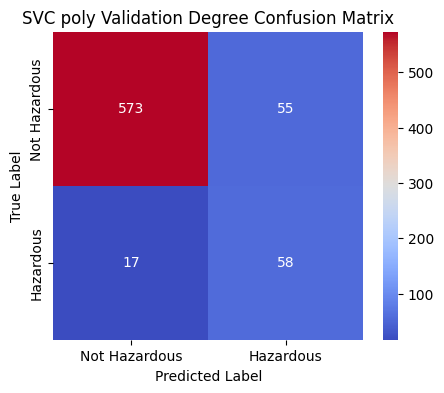


=== Evaluation Report for SVC poly Validation Degree ===
Accuracy : 0.8976
Recall   : 0.7733
Precision: 0.5133
F1 Score : 0.6170

Classification Report:
               precision    recall  f1-score   support

       False       0.97      0.91      0.94       628
        True       0.51      0.77      0.62        75

    accuracy                           0.90       703
   macro avg       0.74      0.84      0.78       703
weighted avg       0.92      0.90      0.91       703


Evaluation Metrics for SVC poly Test Degree:


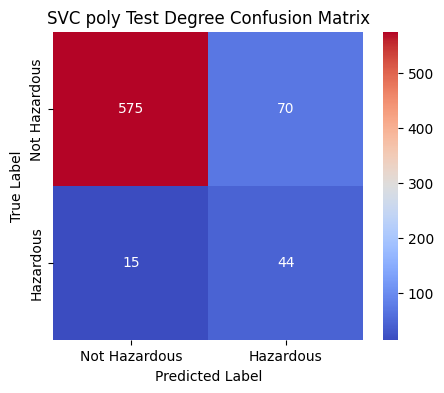


=== Evaluation Report for SVC poly Test Degree ===
Accuracy : 0.8793
Recall   : 0.7458
Precision: 0.3860
F1 Score : 0.5087

Classification Report:
               precision    recall  f1-score   support

       False       0.97      0.89      0.93       645
        True       0.39      0.75      0.51        59

    accuracy                           0.88       704
   macro avg       0.68      0.82      0.72       704
weighted avg       0.93      0.88      0.90       704

7

Evaluation Metrics for SVC poly Validation Degree:


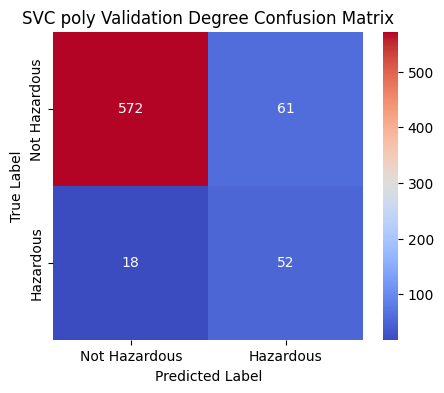


=== Evaluation Report for SVC poly Validation Degree ===
Accuracy : 0.8876
Recall   : 0.7429
Precision: 0.4602
F1 Score : 0.5683

Classification Report:
               precision    recall  f1-score   support

       False       0.97      0.90      0.94       633
        True       0.46      0.74      0.57        70

    accuracy                           0.89       703
   macro avg       0.71      0.82      0.75       703
weighted avg       0.92      0.89      0.90       703


Evaluation Metrics for SVC poly Test Degree:


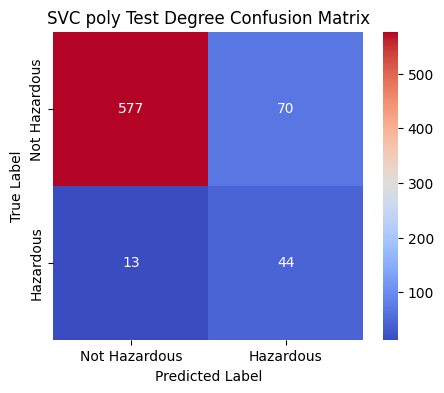


=== Evaluation Report for SVC poly Test Degree ===
Accuracy : 0.8821
Recall   : 0.7719
Precision: 0.3860
F1 Score : 0.5146

Classification Report:
               precision    recall  f1-score   support

       False       0.98      0.89      0.93       647
        True       0.39      0.77      0.51        57

    accuracy                           0.88       704
   macro avg       0.68      0.83      0.72       704
weighted avg       0.93      0.88      0.90       704

8

Evaluation Metrics for SVC poly Validation Degree:


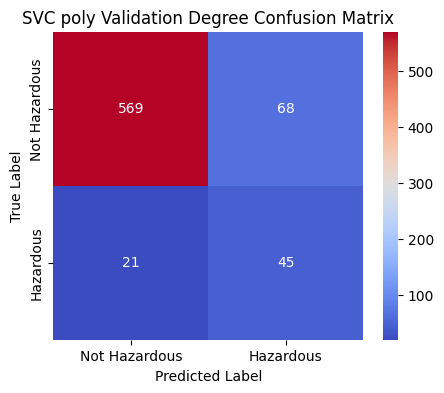


=== Evaluation Report for SVC poly Validation Degree ===
Accuracy : 0.8734
Recall   : 0.6818
Precision: 0.3982
F1 Score : 0.5028

Classification Report:
               precision    recall  f1-score   support

       False       0.96      0.89      0.93       637
        True       0.40      0.68      0.50        66

    accuracy                           0.87       703
   macro avg       0.68      0.79      0.72       703
weighted avg       0.91      0.87      0.89       703


Evaluation Metrics for SVC poly Test Degree:


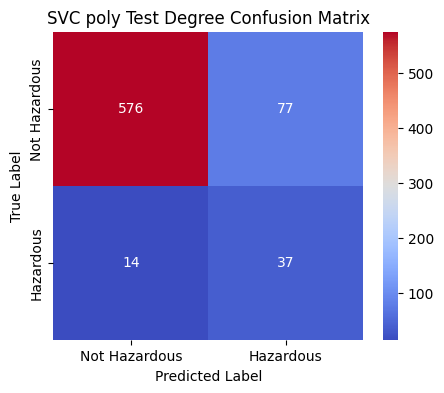


=== Evaluation Report for SVC poly Test Degree ===
Accuracy : 0.8707
Recall   : 0.7255
Precision: 0.3246
F1 Score : 0.4485

Classification Report:
               precision    recall  f1-score   support

       False       0.98      0.88      0.93       653
        True       0.32      0.73      0.45        51

    accuracy                           0.87       704
   macro avg       0.65      0.80      0.69       704
weighted avg       0.93      0.87      0.89       704

9

Evaluation Metrics for SVC poly Validation Degree:


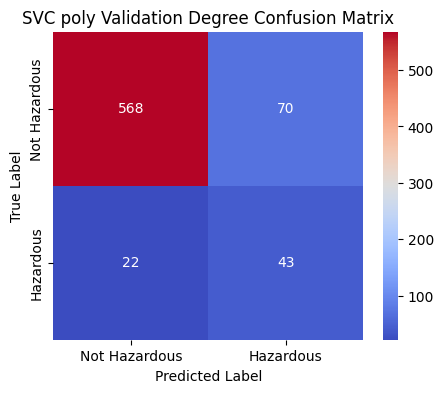


=== Evaluation Report for SVC poly Validation Degree ===
Accuracy : 0.8691
Recall   : 0.6615
Precision: 0.3805
F1 Score : 0.4831

Classification Report:
               precision    recall  f1-score   support

       False       0.96      0.89      0.93       638
        True       0.38      0.66      0.48        65

    accuracy                           0.87       703
   macro avg       0.67      0.78      0.70       703
weighted avg       0.91      0.87      0.88       703


Evaluation Metrics for SVC poly Test Degree:


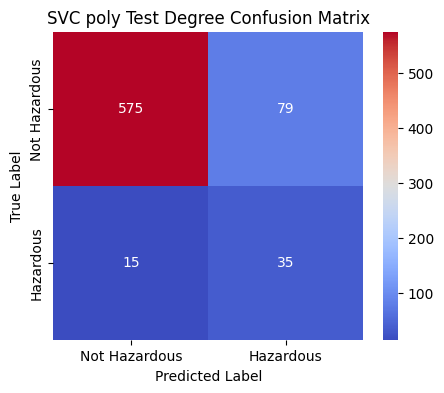


=== Evaluation Report for SVC poly Test Degree ===
Accuracy : 0.8665
Recall   : 0.7000
Precision: 0.3070
F1 Score : 0.4268

Classification Report:
               precision    recall  f1-score   support

       False       0.97      0.88      0.92       654
        True       0.31      0.70      0.43        50

    accuracy                           0.87       704
   macro avg       0.64      0.79      0.68       704
weighted avg       0.93      0.87      0.89       704

10

Evaluation Metrics for SVC poly Validation Degree:


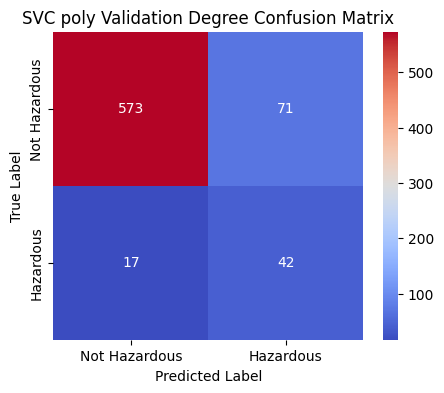


=== Evaluation Report for SVC poly Validation Degree ===
Accuracy : 0.8748
Recall   : 0.7119
Precision: 0.3717
F1 Score : 0.4884

Classification Report:
               precision    recall  f1-score   support

       False       0.97      0.89      0.93       644
        True       0.37      0.71      0.49        59

    accuracy                           0.87       703
   macro avg       0.67      0.80      0.71       703
weighted avg       0.92      0.87      0.89       703


Evaluation Metrics for SVC poly Test Degree:


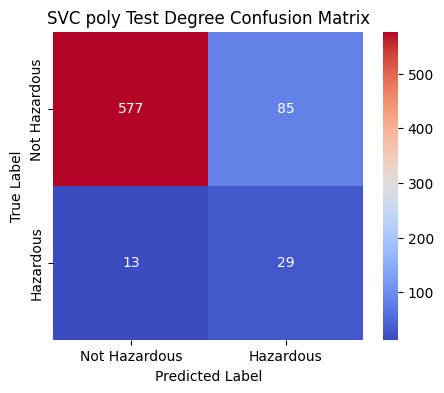


=== Evaluation Report for SVC poly Test Degree ===
Accuracy : 0.8608
Recall   : 0.6905
Precision: 0.2544
F1 Score : 0.3718

Classification Report:
               precision    recall  f1-score   support

       False       0.98      0.87      0.92       662
        True       0.25      0.69      0.37        42

    accuracy                           0.86       704
   macro avg       0.62      0.78      0.65       704
weighted avg       0.93      0.86      0.89       704

11

Evaluation Metrics for SVC poly Validation Degree:


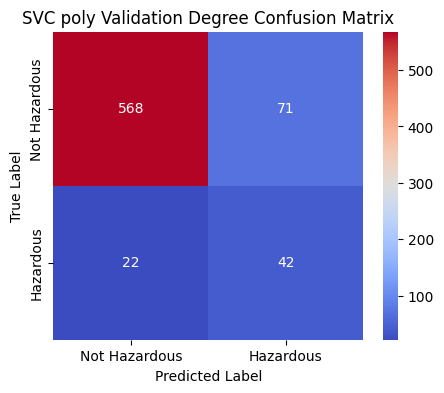


=== Evaluation Report for SVC poly Validation Degree ===
Accuracy : 0.8677
Recall   : 0.6562
Precision: 0.3717
F1 Score : 0.4746

Classification Report:
               precision    recall  f1-score   support

       False       0.96      0.89      0.92       639
        True       0.37      0.66      0.47        64

    accuracy                           0.87       703
   macro avg       0.67      0.77      0.70       703
weighted avg       0.91      0.87      0.88       703


Evaluation Metrics for SVC poly Test Degree:


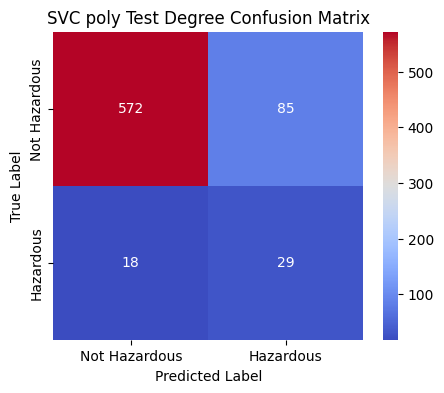


=== Evaluation Report for SVC poly Test Degree ===
Accuracy : 0.8537
Recall   : 0.6170
Precision: 0.2544
F1 Score : 0.3602

Classification Report:
               precision    recall  f1-score   support

       False       0.97      0.87      0.92       657
        True       0.25      0.62      0.36        47

    accuracy                           0.85       704
   macro avg       0.61      0.74      0.64       704
weighted avg       0.92      0.85      0.88       704



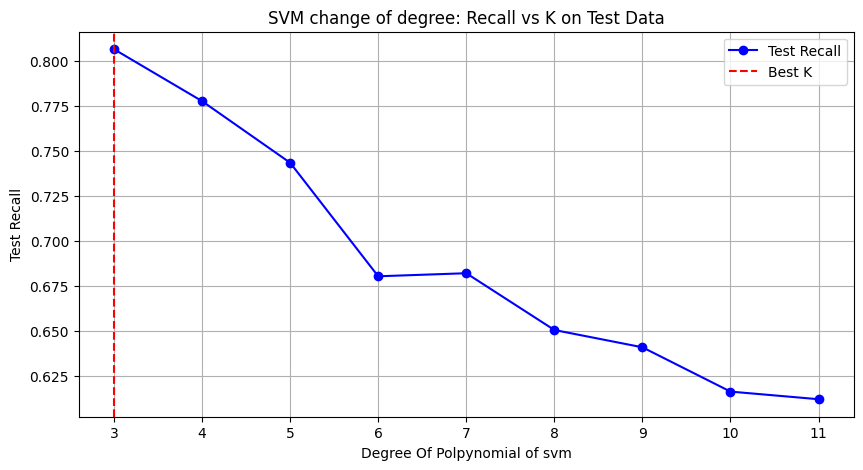

In [46]:
best_accurac = -999
recalls_spd = []
for i in range(3,12):
  def train_model_svc_poly(df_train, df_valid, df_test, target_column="Hazardous"):
    X_train, y_train, X_valid, y_valid, X_test, y_test = x_y_separation(df_train, df_valid, df_test)
    model = SVC(kernel='poly', degree=i, C=8, gamma='scale')
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)
    y_val_pred = model.predict(X_valid)

    return model, y_valid, y_test, y_val_pred, y_test_pred
  model, y_valid, y_test, y_val_pred_sp, y_test_pred_sp = train_model_svc_poly(df_train, df_valid, df_test)
  print(i)
  evaluate_model(y_val_pred_sp,y_valid,"SVC poly Validation Degree")
  evaluate_model(y_test_pred_sp,y_test,"SVC poly Test Degree")
  best_accuracy_b = accuracy_score(y_test, y_test_pred_sp)
  recall_spd = recall_score(y_test, y_test_pred_sp, average='macro')
  recalls_spd.append(recall_spd)
i=[3,4,5,6,7,8,9,10,11]
plt.figure(figsize=(10, 5))
plt.plot(i, recalls_spd, marker='o', linestyle='-', color='blue', label="Test Recall")
plt.axvline(x=3, color='red', linestyle='--', label="Best K")
plt.xlabel("Degree Of Polpynomial of svm")
plt.ylabel("Test Recall")
plt.title("SVM change of degree: Recall vs K on Test Data")
plt.legend()
plt.grid()
plt.show()



1

Evaluation Metrics for SVM rbf Validation:


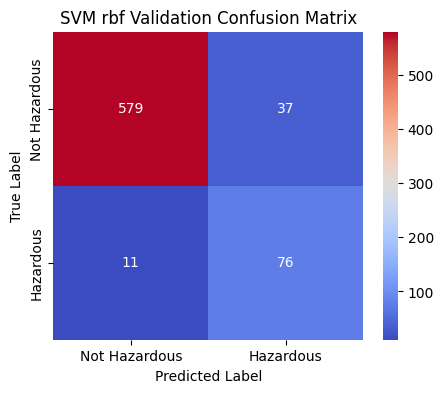


=== Evaluation Report for SVM rbf Validation ===
Accuracy : 0.9317
Recall   : 0.8736
Precision: 0.6726
F1 Score : 0.7600

Classification Report:
               precision    recall  f1-score   support

       False       0.98      0.94      0.96       616
        True       0.67      0.87      0.76        87

    accuracy                           0.93       703
   macro avg       0.83      0.91      0.86       703
weighted avg       0.94      0.93      0.94       703


Evaluation Metrics for SVC rbf Test:


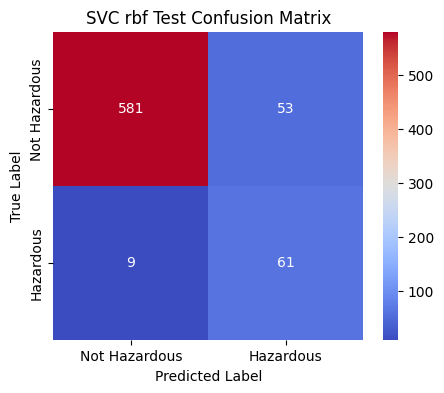


=== Evaluation Report for SVC rbf Test ===
Accuracy : 0.9119
Recall   : 0.8714
Precision: 0.5351
F1 Score : 0.6630

Classification Report:
               precision    recall  f1-score   support

       False       0.98      0.92      0.95       634
        True       0.54      0.87      0.66        70

    accuracy                           0.91       704
   macro avg       0.76      0.89      0.81       704
weighted avg       0.94      0.91      0.92       704

2

Evaluation Metrics for SVM rbf Validation:


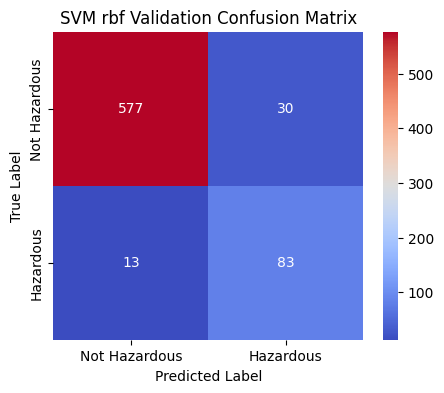


=== Evaluation Report for SVM rbf Validation ===
Accuracy : 0.9388
Recall   : 0.8646
Precision: 0.7345
F1 Score : 0.7943

Classification Report:
               precision    recall  f1-score   support

       False       0.98      0.95      0.96       607
        True       0.73      0.86      0.79        96

    accuracy                           0.94       703
   macro avg       0.86      0.91      0.88       703
weighted avg       0.94      0.94      0.94       703


Evaluation Metrics for SVC rbf Test:


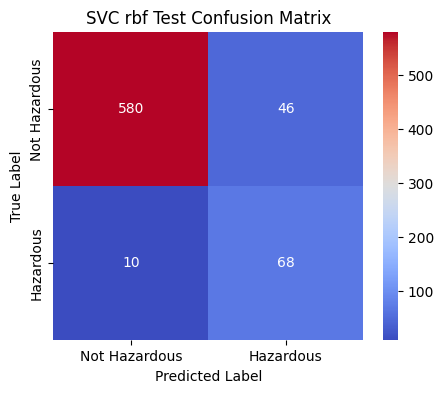


=== Evaluation Report for SVC rbf Test ===
Accuracy : 0.9205
Recall   : 0.8718
Precision: 0.5965
F1 Score : 0.7083

Classification Report:
               precision    recall  f1-score   support

       False       0.98      0.93      0.95       626
        True       0.60      0.87      0.71        78

    accuracy                           0.92       704
   macro avg       0.79      0.90      0.83       704
weighted avg       0.94      0.92      0.93       704

3

Evaluation Metrics for SVM rbf Validation:


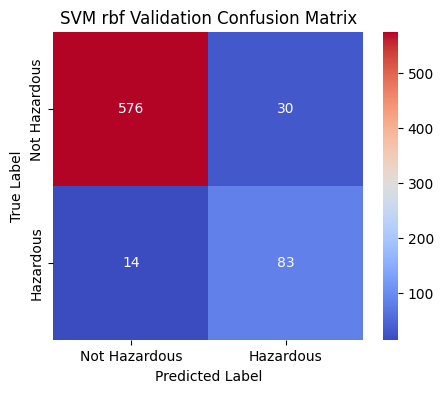


=== Evaluation Report for SVM rbf Validation ===
Accuracy : 0.9374
Recall   : 0.8557
Precision: 0.7345
F1 Score : 0.7905

Classification Report:
               precision    recall  f1-score   support

       False       0.98      0.95      0.96       606
        True       0.73      0.86      0.79        97

    accuracy                           0.94       703
   macro avg       0.86      0.90      0.88       703
weighted avg       0.94      0.94      0.94       703


Evaluation Metrics for SVC rbf Test:


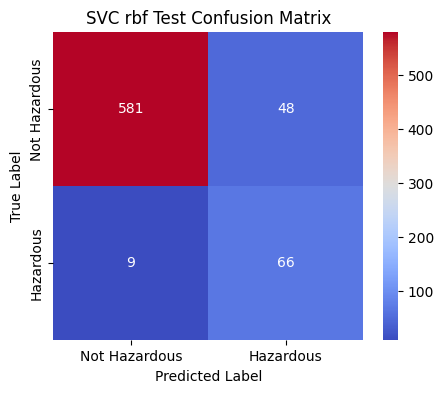


=== Evaluation Report for SVC rbf Test ===
Accuracy : 0.9190
Recall   : 0.8800
Precision: 0.5789
F1 Score : 0.6984

Classification Report:
               precision    recall  f1-score   support

       False       0.98      0.92      0.95       629
        True       0.58      0.88      0.70        75

    accuracy                           0.92       704
   macro avg       0.78      0.90      0.83       704
weighted avg       0.94      0.92      0.93       704

4

Evaluation Metrics for SVM rbf Validation:


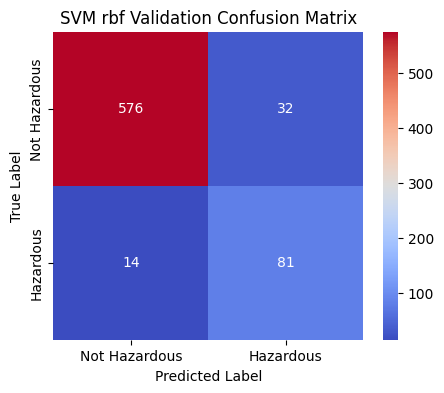


=== Evaluation Report for SVM rbf Validation ===
Accuracy : 0.9346
Recall   : 0.8526
Precision: 0.7168
F1 Score : 0.7788

Classification Report:
               precision    recall  f1-score   support

       False       0.98      0.95      0.96       608
        True       0.72      0.85      0.78        95

    accuracy                           0.93       703
   macro avg       0.85      0.90      0.87       703
weighted avg       0.94      0.93      0.94       703


Evaluation Metrics for SVC rbf Test:


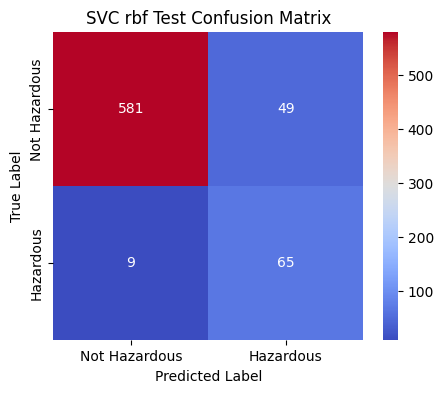


=== Evaluation Report for SVC rbf Test ===
Accuracy : 0.9176
Recall   : 0.8784
Precision: 0.5702
F1 Score : 0.6915

Classification Report:
               precision    recall  f1-score   support

       False       0.98      0.92      0.95       630
        True       0.57      0.88      0.69        74

    accuracy                           0.92       704
   macro avg       0.78      0.90      0.82       704
weighted avg       0.94      0.92      0.93       704

5

Evaluation Metrics for SVM rbf Validation:


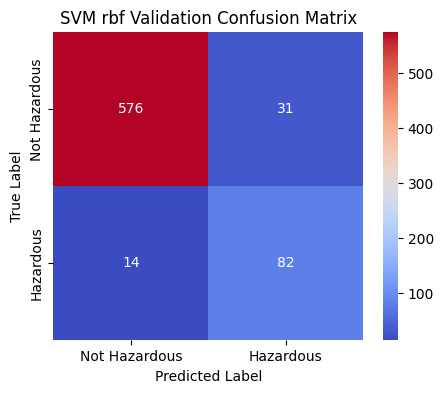


=== Evaluation Report for SVM rbf Validation ===
Accuracy : 0.9360
Recall   : 0.8542
Precision: 0.7257
F1 Score : 0.7847

Classification Report:
               precision    recall  f1-score   support

       False       0.98      0.95      0.96       607
        True       0.73      0.85      0.78        96

    accuracy                           0.94       703
   macro avg       0.85      0.90      0.87       703
weighted avg       0.94      0.94      0.94       703


Evaluation Metrics for SVC rbf Test:


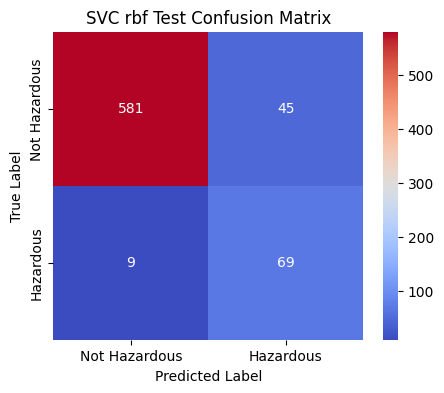


=== Evaluation Report for SVC rbf Test ===
Accuracy : 0.9233
Recall   : 0.8846
Precision: 0.6053
F1 Score : 0.7188

Classification Report:
               precision    recall  f1-score   support

       False       0.98      0.93      0.96       626
        True       0.61      0.88      0.72        78

    accuracy                           0.92       704
   macro avg       0.80      0.91      0.84       704
weighted avg       0.94      0.92      0.93       704

6

Evaluation Metrics for SVM rbf Validation:


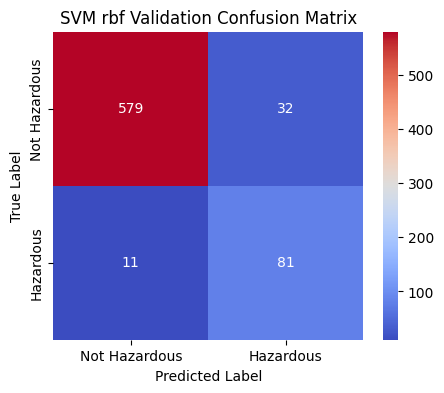


=== Evaluation Report for SVM rbf Validation ===
Accuracy : 0.9388
Recall   : 0.8804
Precision: 0.7168
F1 Score : 0.7902

Classification Report:
               precision    recall  f1-score   support

       False       0.98      0.95      0.96       611
        True       0.72      0.88      0.79        92

    accuracy                           0.94       703
   macro avg       0.85      0.91      0.88       703
weighted avg       0.95      0.94      0.94       703


Evaluation Metrics for SVC rbf Test:


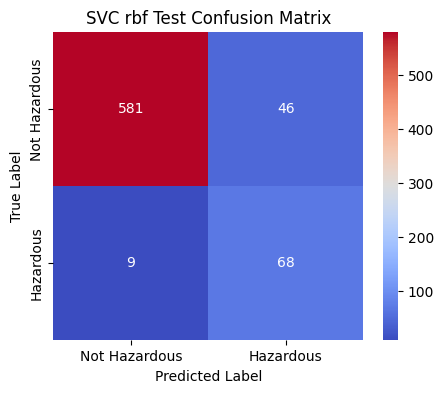


=== Evaluation Report for SVC rbf Test ===
Accuracy : 0.9219
Recall   : 0.8831
Precision: 0.5965
F1 Score : 0.7120

Classification Report:
               precision    recall  f1-score   support

       False       0.98      0.93      0.95       627
        True       0.60      0.88      0.71        77

    accuracy                           0.92       704
   macro avg       0.79      0.90      0.83       704
weighted avg       0.94      0.92      0.93       704

7

Evaluation Metrics for SVM rbf Validation:


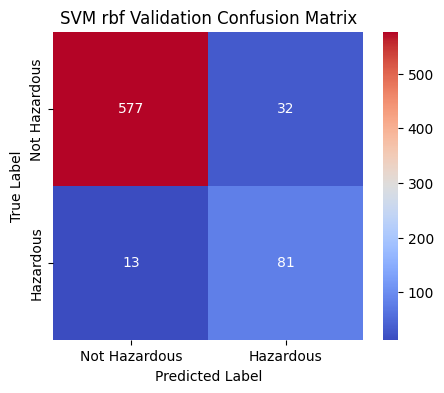


=== Evaluation Report for SVM rbf Validation ===
Accuracy : 0.9360
Recall   : 0.8617
Precision: 0.7168
F1 Score : 0.7826

Classification Report:
               precision    recall  f1-score   support

       False       0.98      0.95      0.96       609
        True       0.72      0.86      0.78        94

    accuracy                           0.94       703
   macro avg       0.85      0.90      0.87       703
weighted avg       0.94      0.94      0.94       703


Evaluation Metrics for SVC rbf Test:


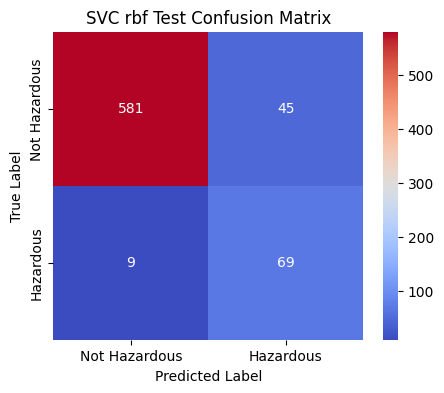


=== Evaluation Report for SVC rbf Test ===
Accuracy : 0.9233
Recall   : 0.8846
Precision: 0.6053
F1 Score : 0.7188

Classification Report:
               precision    recall  f1-score   support

       False       0.98      0.93      0.96       626
        True       0.61      0.88      0.72        78

    accuracy                           0.92       704
   macro avg       0.80      0.91      0.84       704
weighted avg       0.94      0.92      0.93       704

8

Evaluation Metrics for SVM rbf Validation:


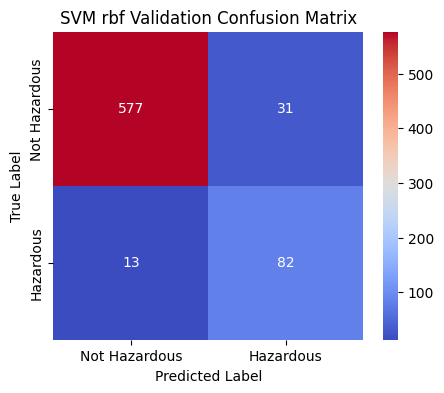


=== Evaluation Report for SVM rbf Validation ===
Accuracy : 0.9374
Recall   : 0.8632
Precision: 0.7257
F1 Score : 0.7885

Classification Report:
               precision    recall  f1-score   support

       False       0.98      0.95      0.96       608
        True       0.73      0.86      0.79        95

    accuracy                           0.94       703
   macro avg       0.85      0.91      0.88       703
weighted avg       0.94      0.94      0.94       703


Evaluation Metrics for SVC rbf Test:


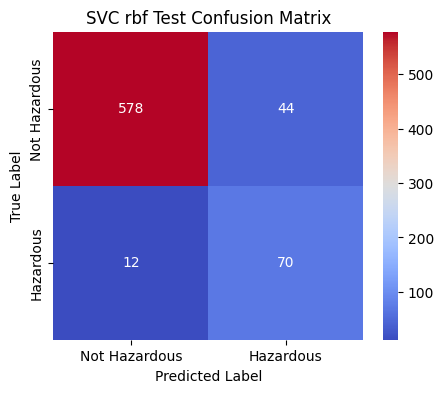


=== Evaluation Report for SVC rbf Test ===
Accuracy : 0.9205
Recall   : 0.8537
Precision: 0.6140
F1 Score : 0.7143

Classification Report:
               precision    recall  f1-score   support

       False       0.98      0.93      0.95       622
        True       0.61      0.85      0.71        82

    accuracy                           0.92       704
   macro avg       0.80      0.89      0.83       704
weighted avg       0.94      0.92      0.93       704

9

Evaluation Metrics for SVM rbf Validation:


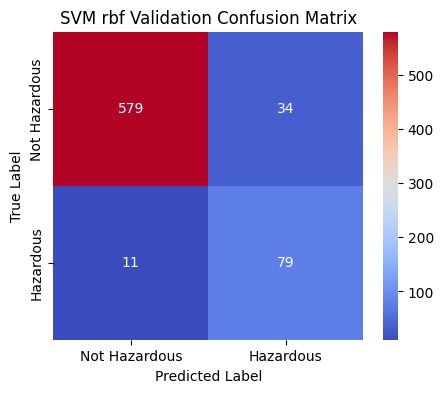


=== Evaluation Report for SVM rbf Validation ===
Accuracy : 0.9360
Recall   : 0.8778
Precision: 0.6991
F1 Score : 0.7783

Classification Report:
               precision    recall  f1-score   support

       False       0.98      0.94      0.96       613
        True       0.70      0.88      0.78        90

    accuracy                           0.94       703
   macro avg       0.84      0.91      0.87       703
weighted avg       0.95      0.94      0.94       703


Evaluation Metrics for SVC rbf Test:


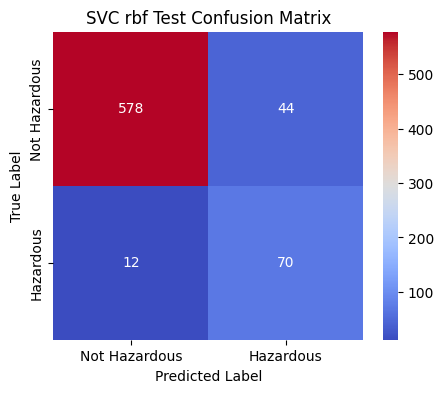


=== Evaluation Report for SVC rbf Test ===
Accuracy : 0.9205
Recall   : 0.8537
Precision: 0.6140
F1 Score : 0.7143

Classification Report:
               precision    recall  f1-score   support

       False       0.98      0.93      0.95       622
        True       0.61      0.85      0.71        82

    accuracy                           0.92       704
   macro avg       0.80      0.89      0.83       704
weighted avg       0.94      0.92      0.93       704



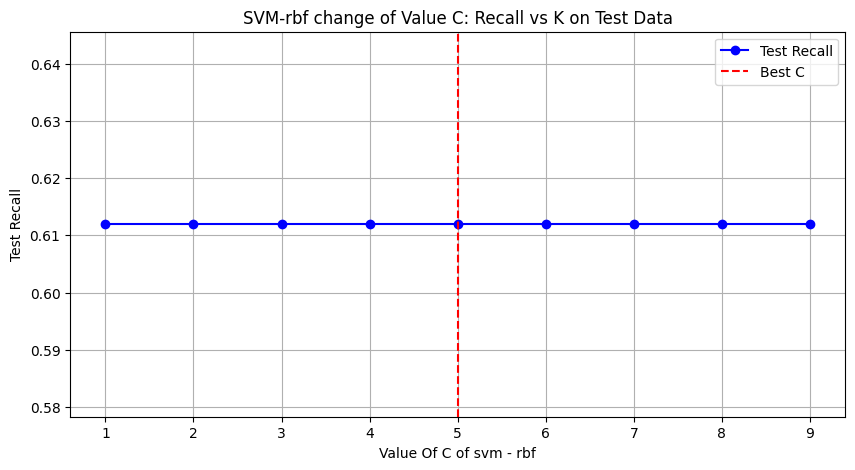

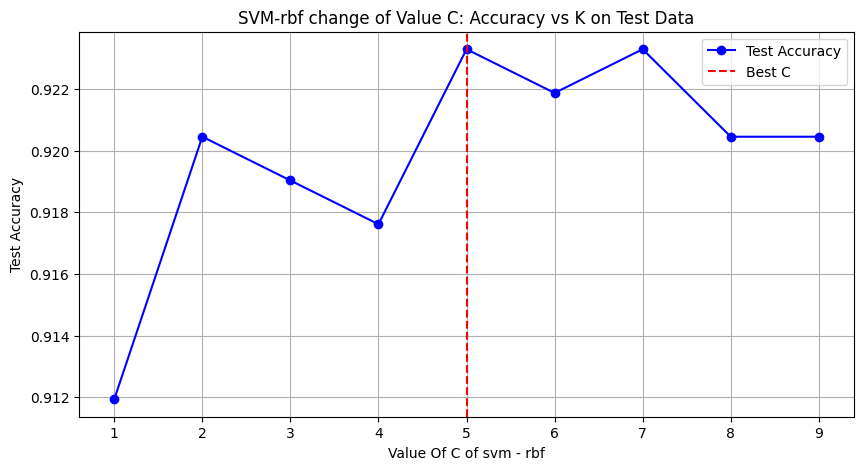

In [47]:
recalls_spr=[]
accuracies_spr = []
for i in range(1,10):
  def train_model_svc_rbf(df_train, df_valid, df_test, target_column="Hazardous"):
    X_train, y_train, X_valid, y_valid, X_test, y_test = x_y_separation(df_train, df_valid, df_test)

    model = SVC(kernel='rbf', C=i, gamma='scale')
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)
    y_val_pred = model.predict(X_valid)

    return model, y_valid, y_test, y_val_pred, y_test_pred
  model, y_valid, y_test, y_val_pred_sp, y_test_pred_sp = train_model_svc_rbf(df_train, df_valid, df_test)
  print(i)
  evaluate_model(y_val_pred_sp,y_valid,"SVM rbf Validation")
  evaluate_model(y_test_pred_sp,y_test,"SVC rbf Test")
  recall_spr = recall_score(y_test, y_test_pred_sp, average='macro')
  recalls_spr.append(recall_spd)
  accuracy_spr = accuracy_score(y_test_pred_sp,y_test)
  accuracies_spr.append(accuracy_spr)
i=[1,2,3,4,5,6,7,8,9]
plt.figure(figsize=(10, 5))
plt.plot(i, recalls_spr, marker='o', linestyle='-', color='blue', label="Test Recall")
plt.axvline(x=5, color='red', linestyle='--', label="Best C")
plt.xlabel("Value Of C of svm - rbf")
plt.ylabel("Test Recall")
plt.title("SVM-rbf change of Value C: Recall vs K on Test Data")
plt.legend()
plt.grid()
plt.show()
plt.figure(figsize=(10, 5))
plt.plot(i, accuracies_spr, marker='o', linestyle='-', color='blue', label="Test Accuracy")
plt.axvline(x=5, color='red', linestyle='--', label="Best C")
plt.xlabel("Value Of C of svm - rbf")
plt.ylabel("Test Accuracy")
plt.title("SVM-rbf change of Value C: Accuracy vs K on Test Data")
plt.legend()
plt.grid()
plt.show()


